In [12]:
import csv
import glob

# Replace '*.txt' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/*.txt'):
    # Generate output file name by replacing '.txt' with '.csv'
    output_file_path = file_path.replace('.txt', '.csv')

    with open(file_path, 'r') as input_file, open(output_file_path, 'w', newline='') as output_file:
        # Create a CSV writer object
        writer = csv.writer(output_file)
        
        # Iterate over each line in the input file
        for line in input_file:
            # Split the line into fields using the tab delimiter
            fields = line.strip().split('\t')

            # Write the fields to the CSV file
            writer.writerow(fields)

In [14]:
import pandas as pd
import glob
import os

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/*.csv'):
    # Generate output file name by prefixing 'Separate' to the input file name
    output_file_path = 'SeparateProteinIDs_' + file_path  

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

    # Write the new DataFrame to a separate CSV file
    new_df.to_csv(output_file_path, index=False)

In [ ]:
#doublechecking format 

In [15]:
df= pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/Separate_ProteinIDs/proteinGroups_savitski_no_remap_32.csv')
print(df)

       Q-value Protein Type  Protein Uniprot Protein Label
0     0.000179           sp           P42566   EPS15_HUMAN
1     0.000179           sp           Q5JSL3   DOC11_HUMAN
2     0.000179           sp           Q1KMD3   HNRL2_HUMAN
3     0.000179           sp           Q16204   CCDC6_HUMAN
4     0.000179           sp           P09001    RM03_HUMAN
...        ...          ...              ...           ...
9466  0.214909           sp         Q86UW9-2    DTX2_HUMAN
9467  0.215037      REV__pI  c12riboseqorf96           NaN
9468  0.215110      REV__sp           Q9UIJ5   ZDHC2_HUMAN
9469  0.215110           sp           Q5TCS8    KAD9_HUMAN
9470  0.215110           sp           P06858    LIPL_HUMAN

[9471 rows x 4 columns]


In [17]:
import pandas as pd
import glob
import os

# Create the output directory if it does not exist
output_dir = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/0.01_Filter'
os.makedirs(output_dir, exist_ok=True)

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/*.csv'):
    # Generate output file name with the prefix '0.01_Filter_' and suffix '.csv'
    output_file_name = '0.01_Filter_' + os.path.basename(file_path)
    output_file_path = os.path.join(output_dir, output_file_name)

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Filter for Q-value < 0.01
    df = df[df['Q-value'] < 0.01]

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Write the new DataFrame to a separate CSV file in the output directory
    new_df.to_csv(output_file_path, index=False)


In [ ]:
#displaying number of target and decoy proteins per file. 

In [18]:
df= pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/0.01_Filter/0.01_Filter_proteinGroups_classic_grouping_no_remap_1.csv')
print(df)


       Q-value Protein Type Protein Uniprot  \
0     0.000168           sp          P15289   
1     0.000168           sp          P30101   
2     0.000168           sp          O43815   
3     0.000168           sp          Q86V81   
4     0.000168           sp          Q5T4S7   
...        ...          ...             ...   
6362  0.009990           sp          O60232   
6363  0.009990           sp          Q309B1   
6364  0.009990           sp          Q14213   
6365  0.009990           sp          Q6PCB8   
6366  0.009990           sp          Q9UMZ3   

                                          Protein Label  
0                     ARSA_HUMAN;sp|P15289-2|ARSA_HUMAN  
1                                           PDIA3_HUMAN  
2                     STRN_HUMAN;sp|O43815-2|STRN_HUMAN  
3                                           THOC4_HUMAN  
4     UBR4_HUMAN;sp|Q5T4S7-4|UBR4_HUMAN;sp|Q5T4S7-3|...  
...                                                 ...  
6362                         

In [23]:
import os
import csv

folder_path = "/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/0.01_Filter/"  # replace with the path to your folder
decoy_prefix = "REV__"

# initialize the counters
total_target_proteins = 0
total_decoy_proteins = 0

# create a list to store the results for each file
result_list = []

# iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # extract the method and number of raw files from the filename
        method = filename.split("_")[2:-1]
        method = "_".join(method)
        num_raw_files = int(filename.split("_")[-1].split(".")[0])
        
        # initialize the counters for this file
        file_target_proteins = 0
        file_decoy_proteins = 0
        
        # open the file and read the protein type column
        with open(os.path.join(folder_path, filename)) as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                protein_type = row["Protein Type"]
                
                # count the protein types
                if protein_type.startswith(decoy_prefix):
                    file_decoy_proteins += 1
                else:
                    file_target_proteins += 1
        
        # add the file results to the result list
        result_list.append((filename, file_target_proteins, file_decoy_proteins, num_raw_files, method))

# create a DataFrame from the result list
df = pd.DataFrame(result_list, columns=["file name", "target proteins", "decoy proteins", "num raw files", "method"])

# print the DataFrame
print(df)
df.to_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/individual_plots.csv', index=False)


                                             file name  target proteins  \
0    0.01_Filter_proteinGroups_savitski_no_remap_25...             8386   
1    0.01_Filter_proteinGroups_classic_no_grouping_...             7059   
2    0.01_Filter_proteinGroups_classic_grouping_no_...             8041   
3    0.01_Filter_proteinGroups_classic_grouping_no_...             7724   
4    0.01_Filter_proteinGroups_savitski_subset_no_r...            14118   
..                                                 ...              ...   
139  0.01_Filter_proteinGroups_classic_rescue_group...             7363   
140  0.01_Filter_proteinGroups_picked_subset_no_rem...            10716   
141  0.01_Filter_proteinGroups_savitski_subset_no_r...             6334   
142  0.01_Filter_proteinGroups_savitski_subset_no_r...             8067   
143  0.01_Filter_proteinGroups_savitski_no_remap_8.csv             4695   

     decoy proteins  num raw files  \
0                82            256   
1                69    

In [24]:
df= pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/individual_plots.csv')
print(df)

                                             file name  target proteins  \
0    0.01_Filter_proteinGroups_savitski_no_remap_25...             8386   
1    0.01_Filter_proteinGroups_classic_no_grouping_...             7059   
2    0.01_Filter_proteinGroups_classic_grouping_no_...             8041   
3    0.01_Filter_proteinGroups_classic_grouping_no_...             7724   
4    0.01_Filter_proteinGroups_savitski_subset_no_r...            14118   
..                                                 ...              ...   
139  0.01_Filter_proteinGroups_classic_rescue_group...             7363   
140  0.01_Filter_proteinGroups_picked_subset_no_rem...            10716   
141  0.01_Filter_proteinGroups_savitski_subset_no_r...             6334   
142  0.01_Filter_proteinGroups_savitski_subset_no_r...             8067   
143  0.01_Filter_proteinGroups_savitski_no_remap_8.csv             4695   

     decoy proteins  num raw files  \
0                82            256   
1                69    

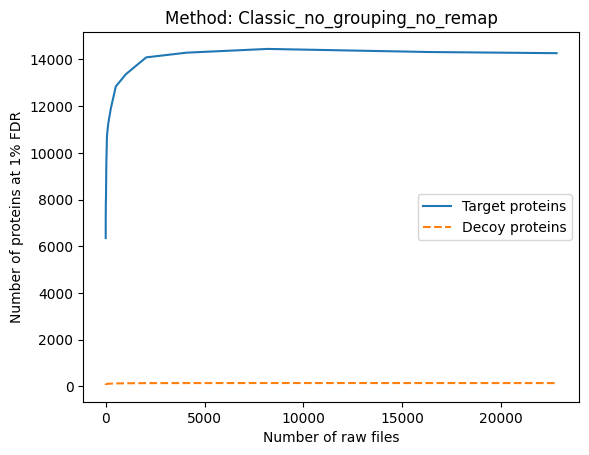

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV file into a DataFrame
df= pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/individual_plots.csv')

# group the DataFrame by method
grouped = df.groupby("method")

# specify the method(s) you want to plot
methods_to_plot = ["proteinGroups_picked_subset_no_remap"]

# plot the data for the specified method(s)
for method in methods_to_plot:
    group = grouped.get_group(method)
    
    # sort the group by number of raw files
    group = group.sort_values(by="num raw files")
    
    # plot the data
    plt.plot(group["num raw files"], group["target proteins"], label="Target proteins")
    plt.plot(group["num raw files"], group["decoy proteins"], label="Decoy proteins", linestyle='--')
    plt.xlabel("Number of raw files")
    plt.ylabel("Number of proteins at 1% FDR")
    plt.title(f"Method: Classic_no_grouping_no_remap")
    plt.legend()
    plt.show()

In [ ]:
#at 100% FDR 

In [32]:
import pandas as pd
import glob
import os

# Create the output directory if it does not exist
output_dir = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/100_FDR'
os.makedirs(output_dir, exist_ok=True)

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/*.csv'):
    # Generate output file name with the prefix '0.01_Filter_' and suffix '.csv'
    output_file_name = '100_FDR_' + os.path.basename(file_path)
    output_file_path = os.path.join(output_dir, output_file_name)

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Write the new DataFrame to a separate CSV file in the output directory
    new_df.to_csv(output_file_path, index=False)


In [33]:
import os
import csv

folder_path = "/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/100_FDR/"  # replace with the path to your folder
decoy_prefix = "REV__"

# initialize the counters
total_target_proteins = 0
total_decoy_proteins = 0

# create a list to store the results for each file
result_list = []

# iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # extract the method and number of raw files from the filename
        method = filename.split("_")[2:-1]
        method = "_".join(method)
        num_raw_files = int(filename.split("_")[-1].split(".")[0])
        
        # initialize the counters for this file
        file_target_proteins = 0
        file_decoy_proteins = 0
        
        # open the file and read the protein type column
        with open(os.path.join(folder_path, filename)) as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                protein_type = row["Protein Type"]
                
                # count the protein types
                if protein_type.startswith(decoy_prefix):
                    file_decoy_proteins += 1
                else:
                    file_target_proteins += 1
        
        # add the file results to the result list
        result_list.append((filename, file_target_proteins, file_decoy_proteins, num_raw_files, method))

# create a DataFrame from the result list
df = pd.DataFrame(result_list, columns=["file name", "target proteins", "decoy proteins", "num raw files", "method"])

# print the DataFrame
print(df)
df.to_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/individual_plots_100_FDR.csv', index=False)


                                             file name  target proteins  \
0    100_FDR_proteinGroups_savitski_subset_no_remap...            10060   
1        100_FDR_proteinGroups_savitski_no_remap_2.csv             4284   
2    100_FDR_proteinGroups_classic_no_grouping_no_r...            26601   
3    100_FDR_proteinGroups_classic_no_grouping_no_r...             9878   
4    100_FDR_proteinGroups_savitski_rescued_subset_...            15092   
..                                                 ...              ...   
139  100_FDR_proteinGroups_picked_protein_group_no_...            16170   
140  100_FDR_proteinGroups_classic_grouping_no_rema...             9127   
141  100_FDR_proteinGroups_savitski_subset_no_remap...            20851   
142  100_FDR_proteinGroups_savitski_subset_no_remap...            31914   
143  100_FDR_proteinGroups_savitski_no_remap_22796.csv            29005   

     decoy proteins  num raw files  \
0              2389             16   
1               266    

In [ ]:
#Show for all at 100% and 1% FDR. change methods accordingly. 

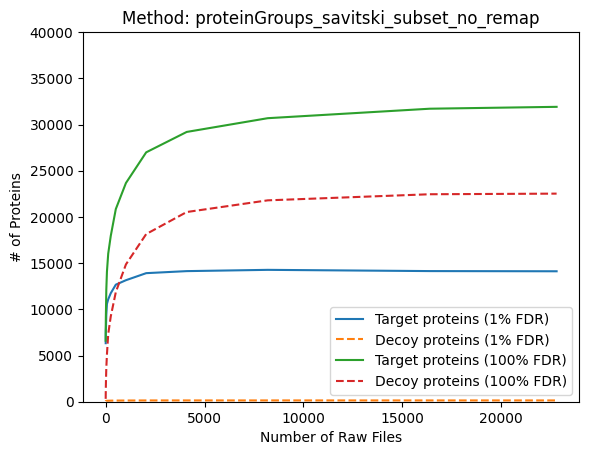

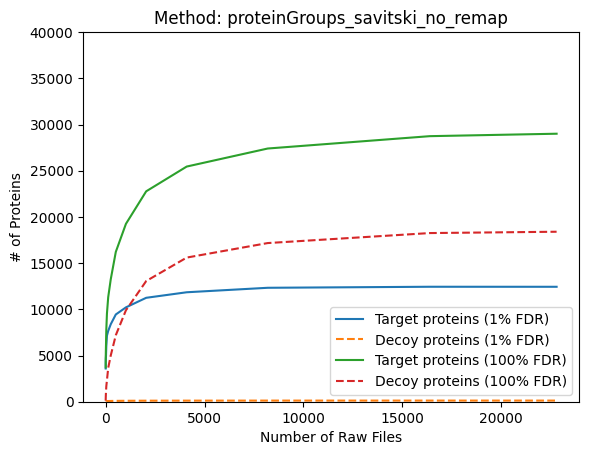

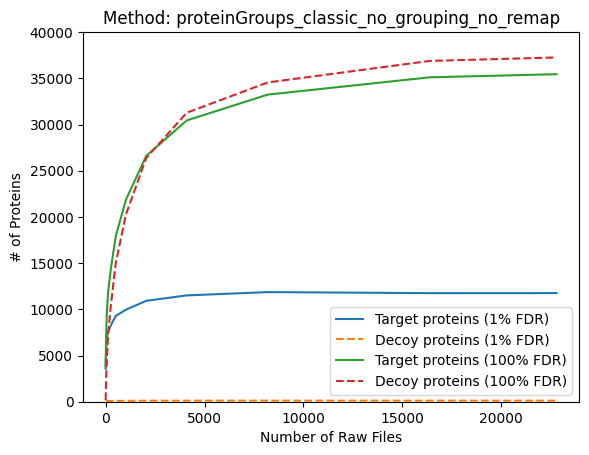

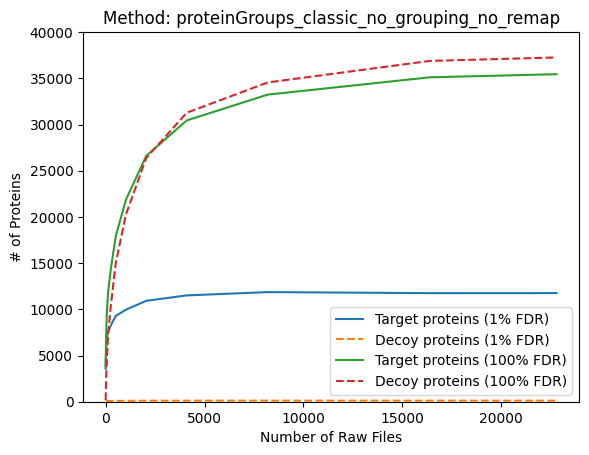

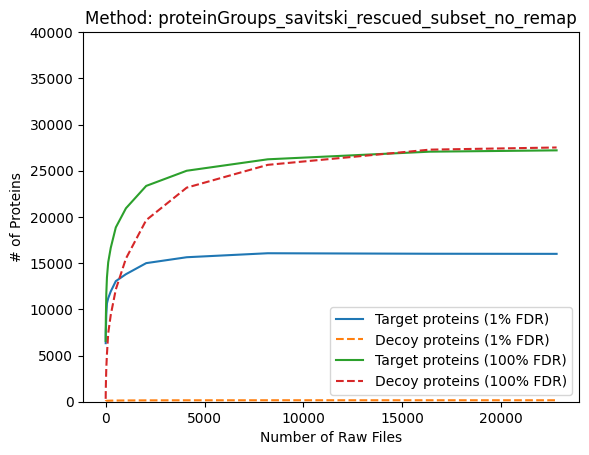

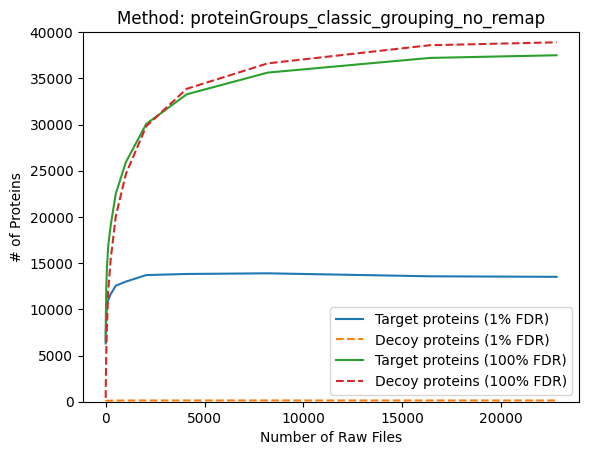

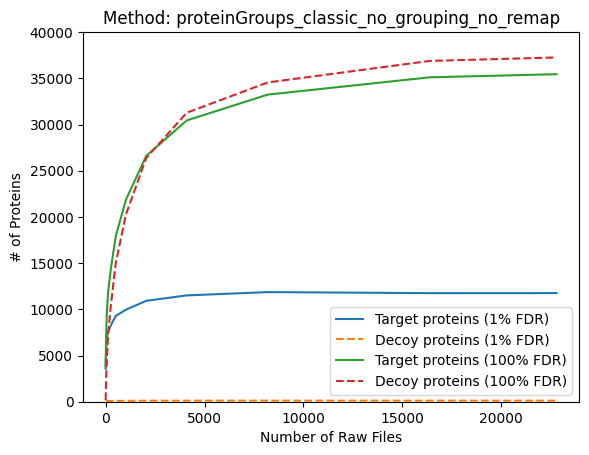

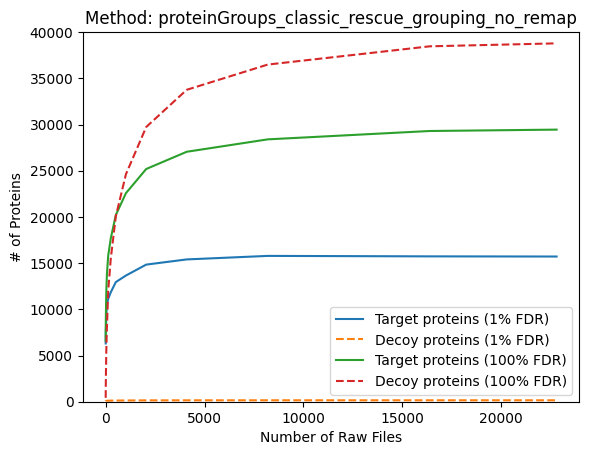

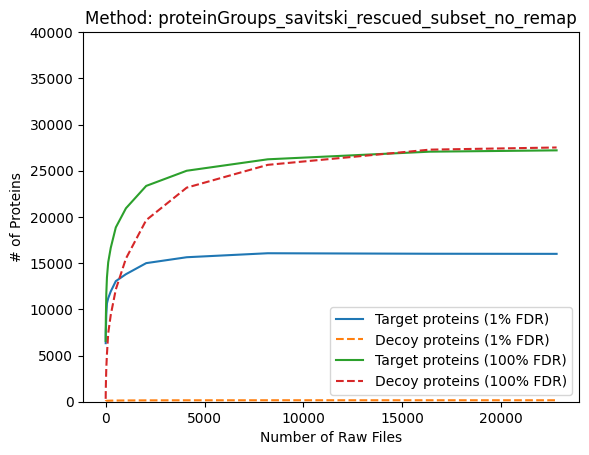

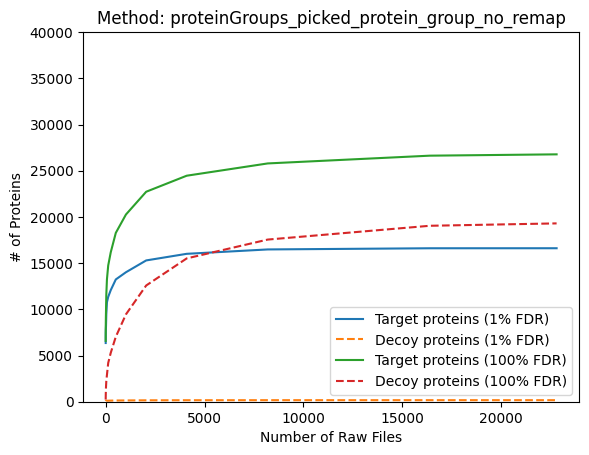

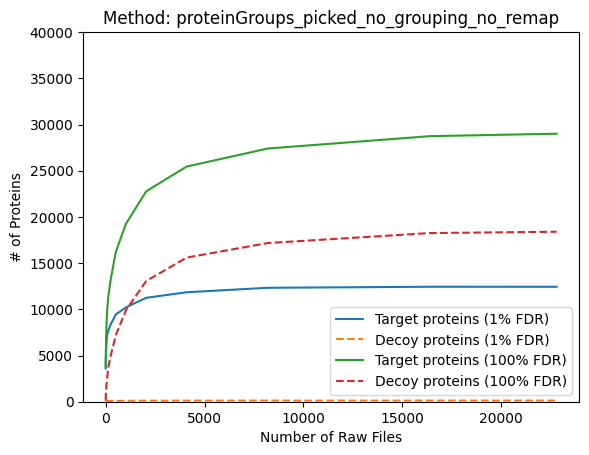

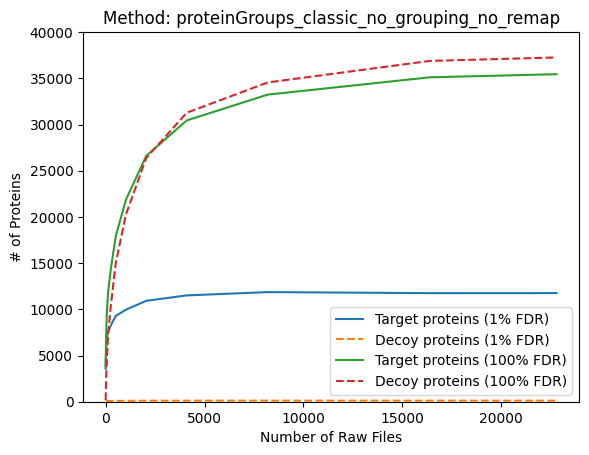

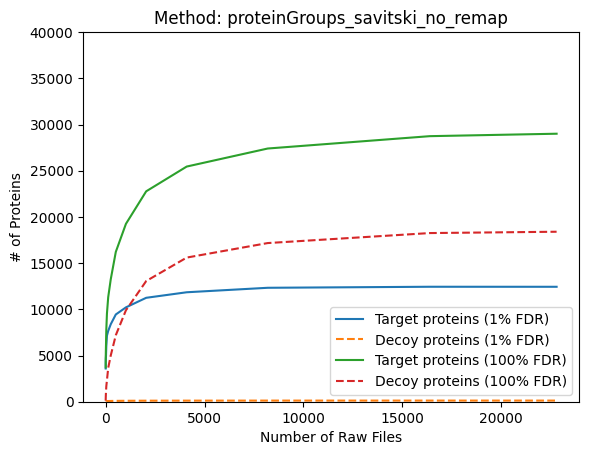

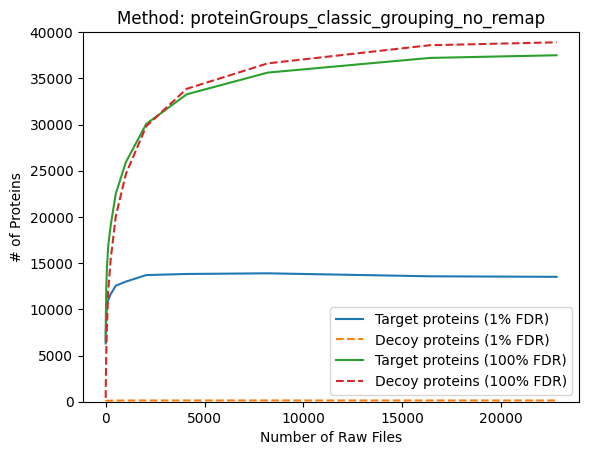

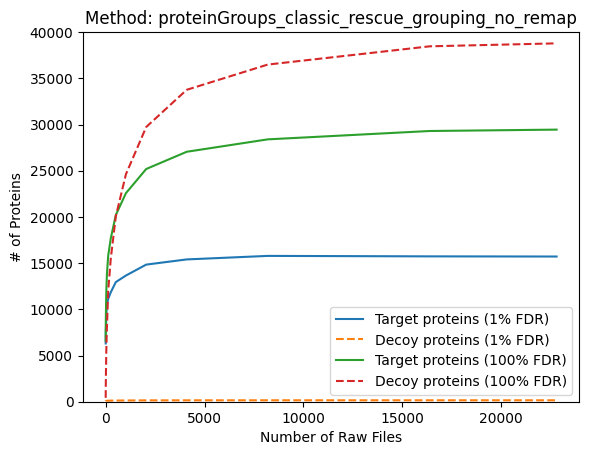

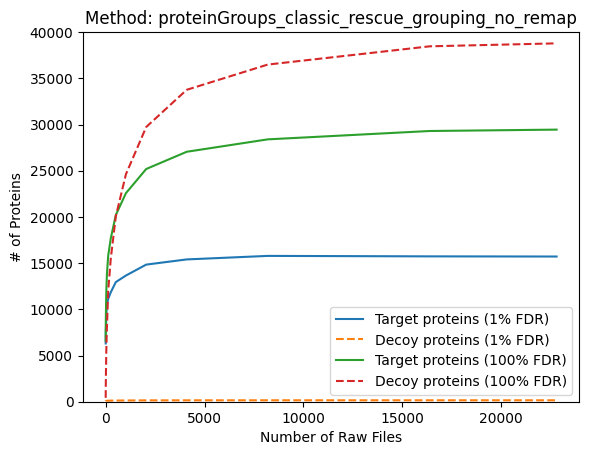

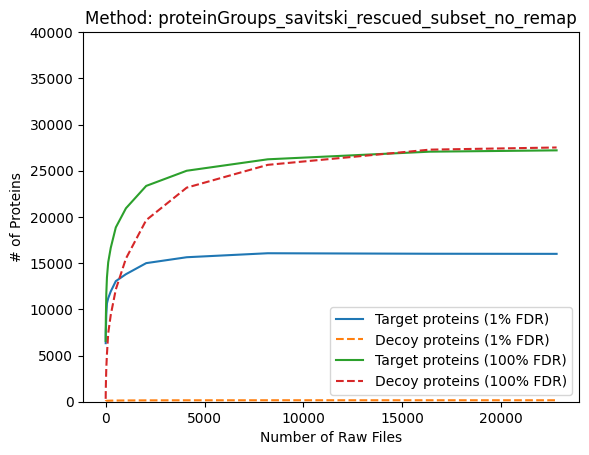

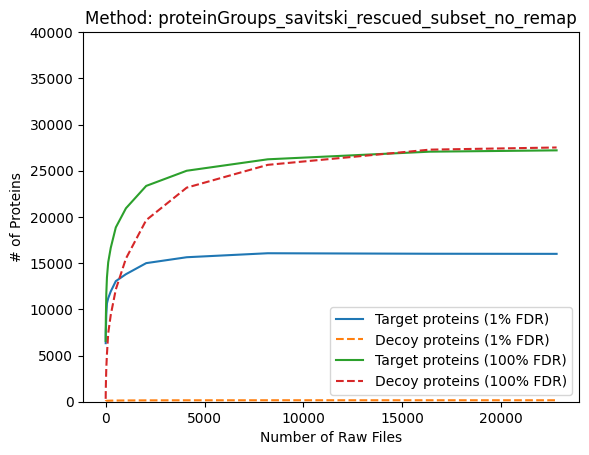

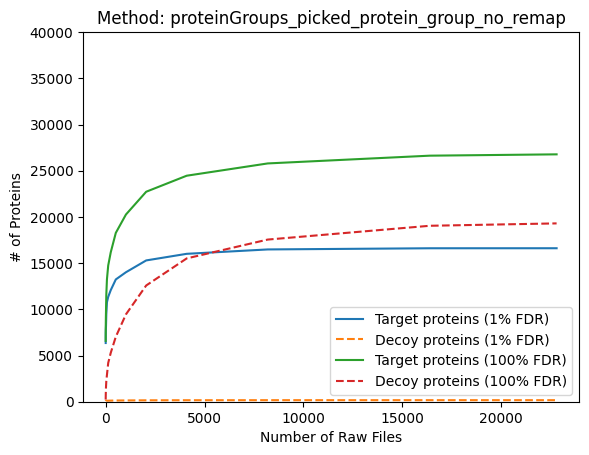

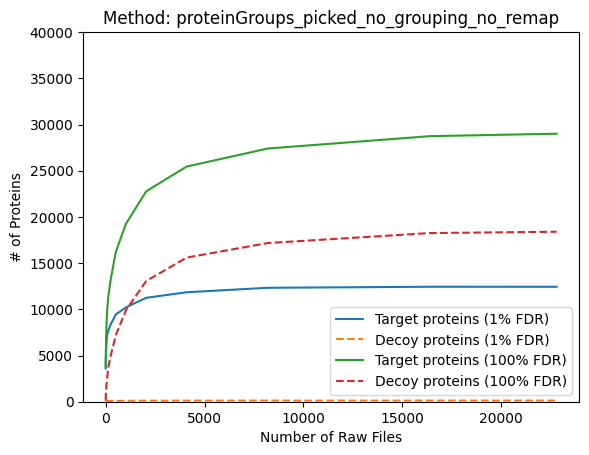

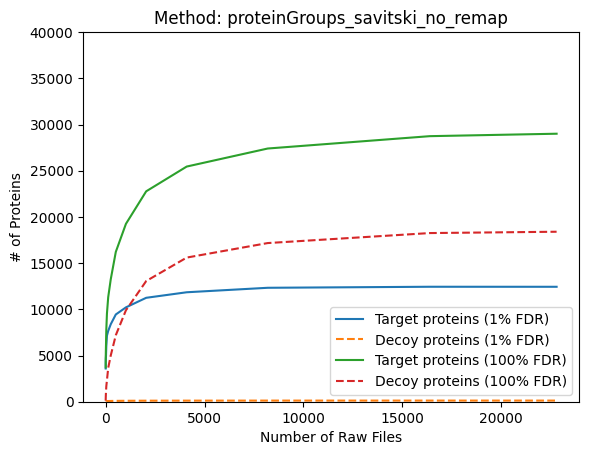

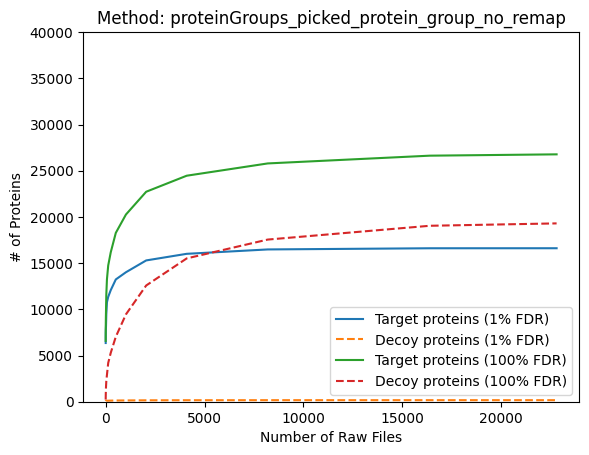

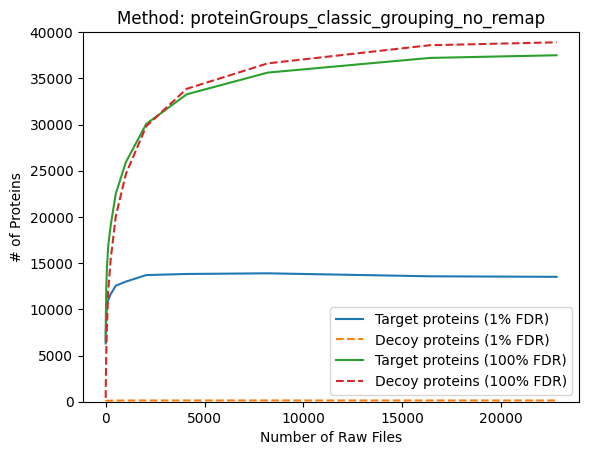

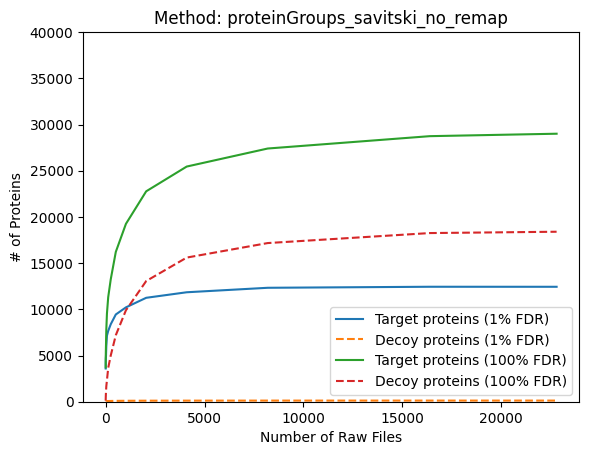

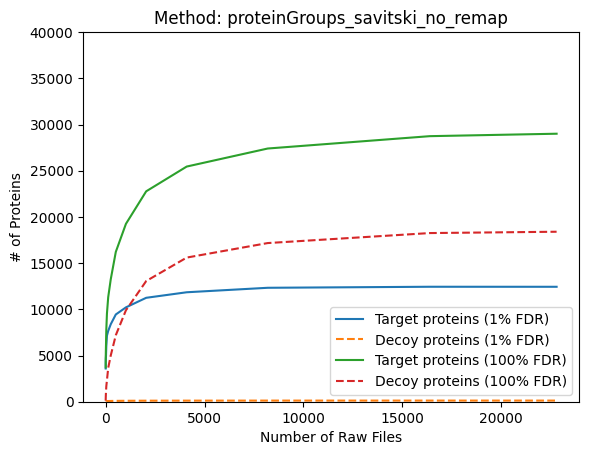

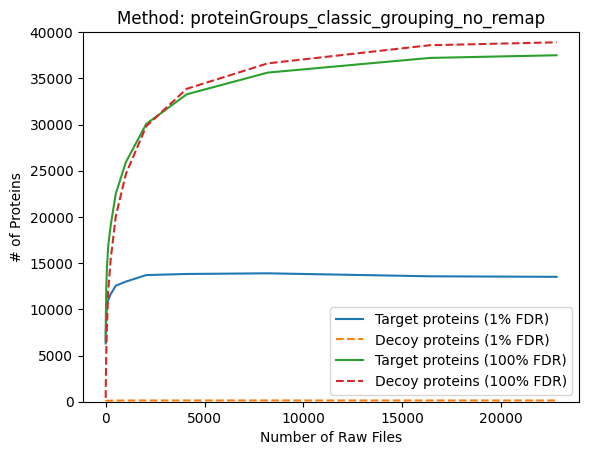

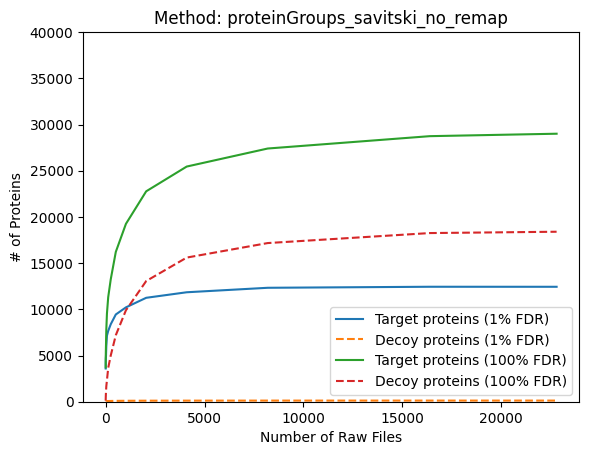

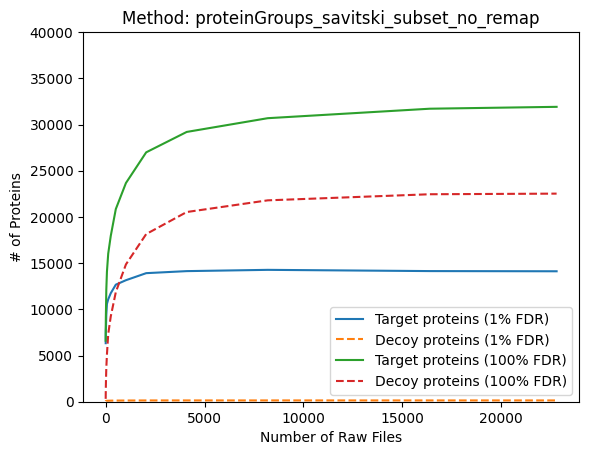

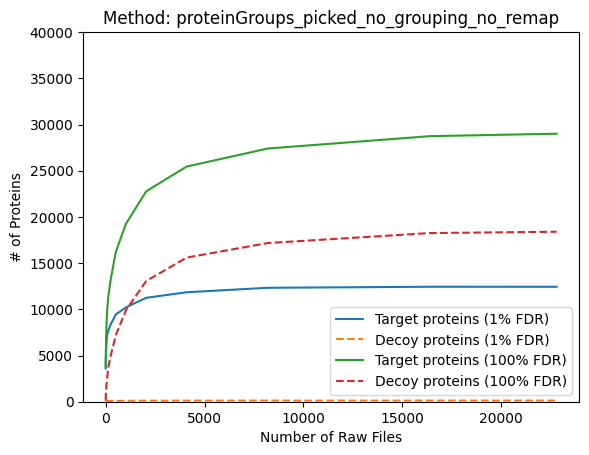

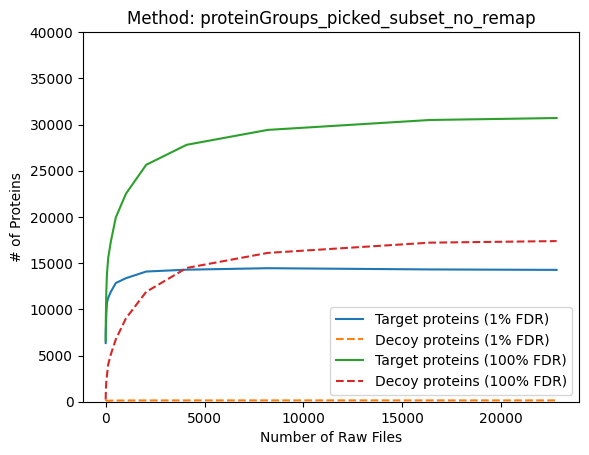

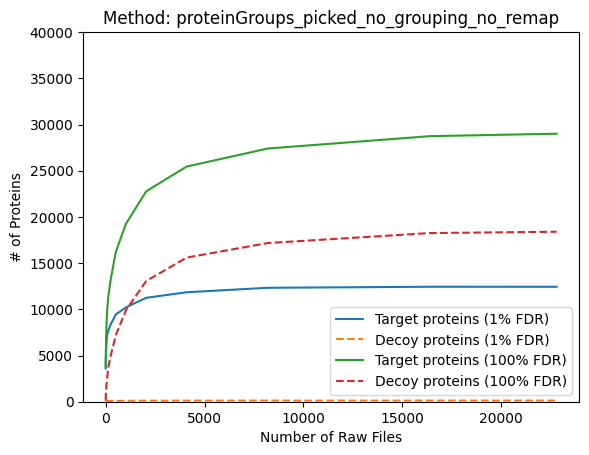

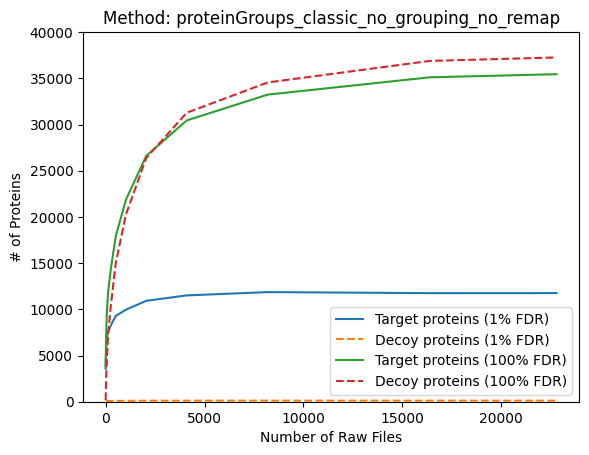

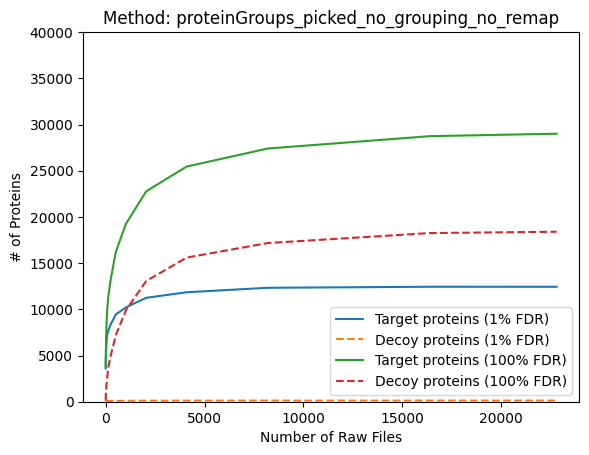

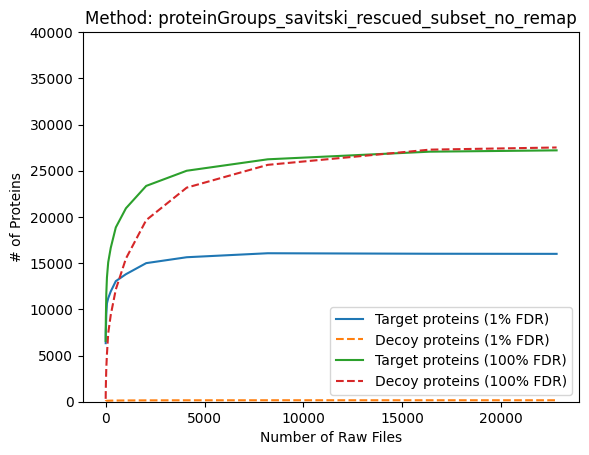

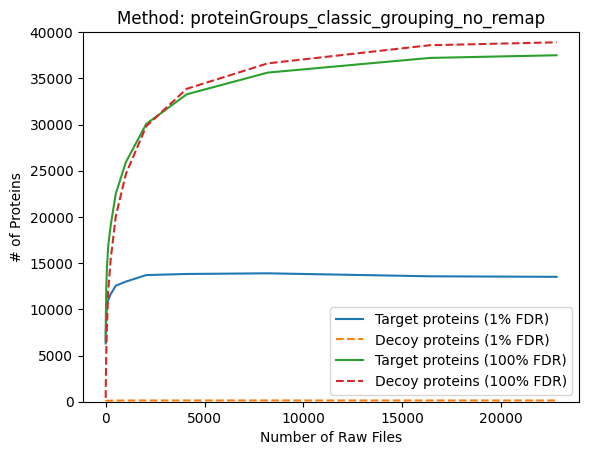

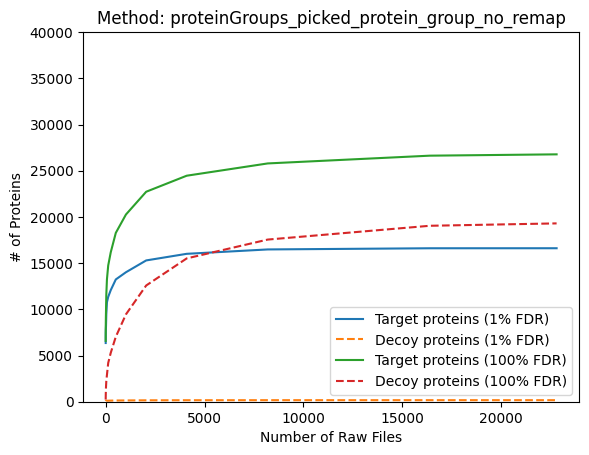

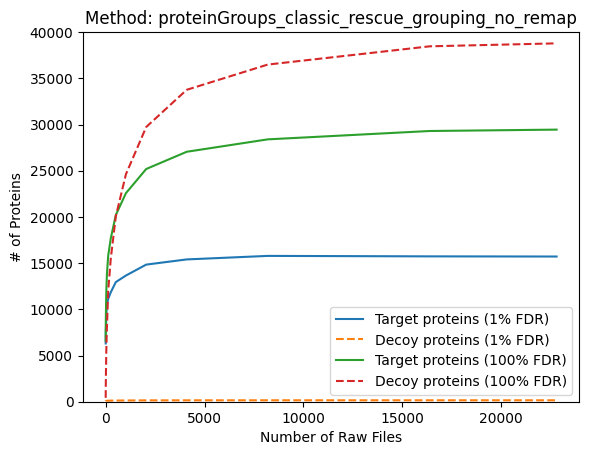

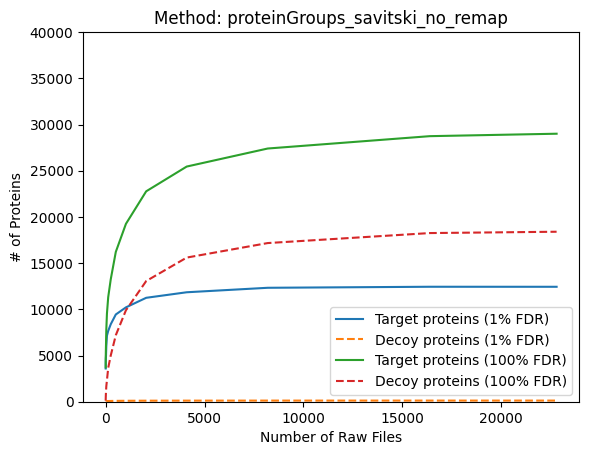

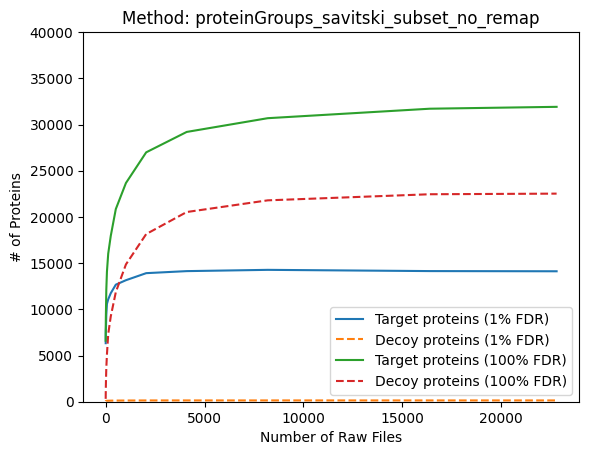

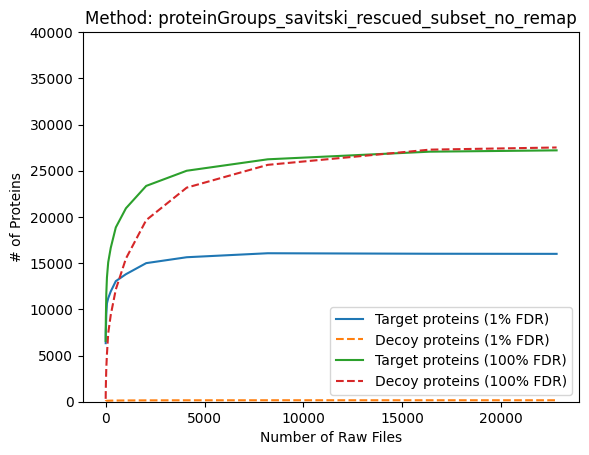

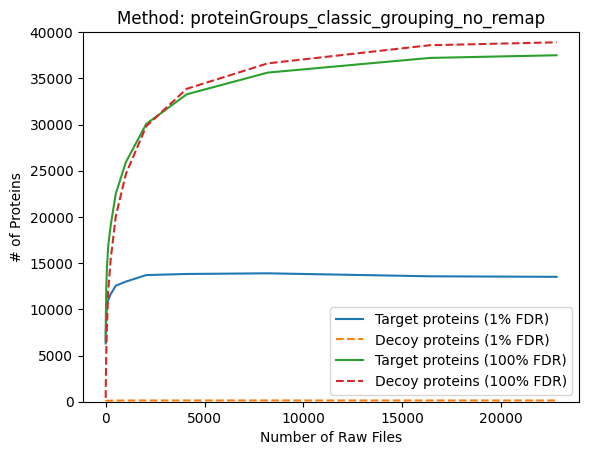

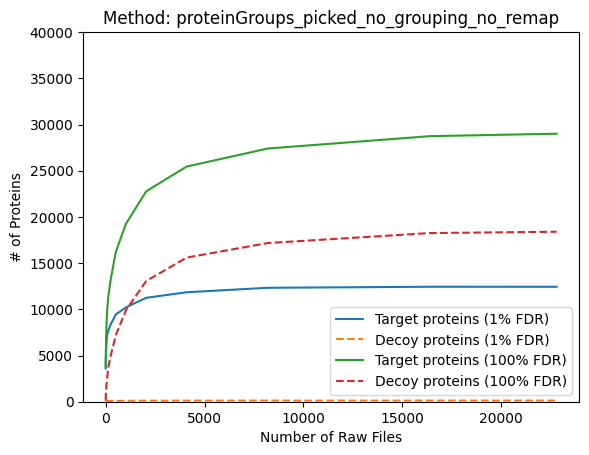

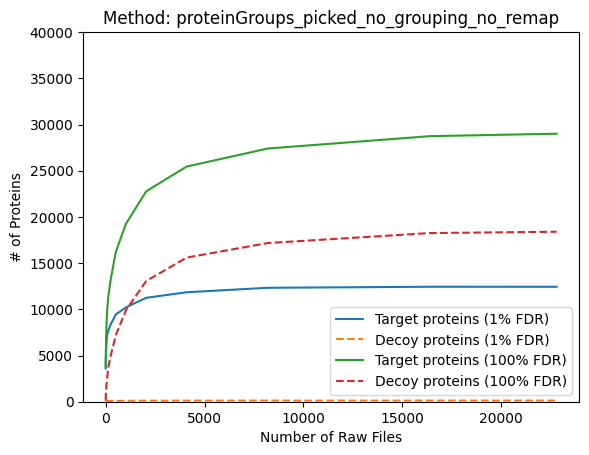

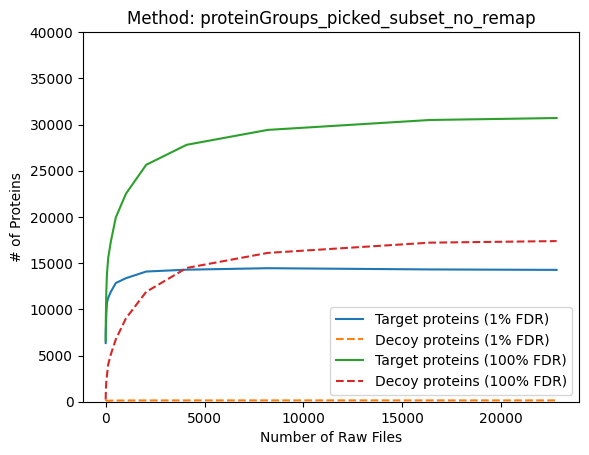

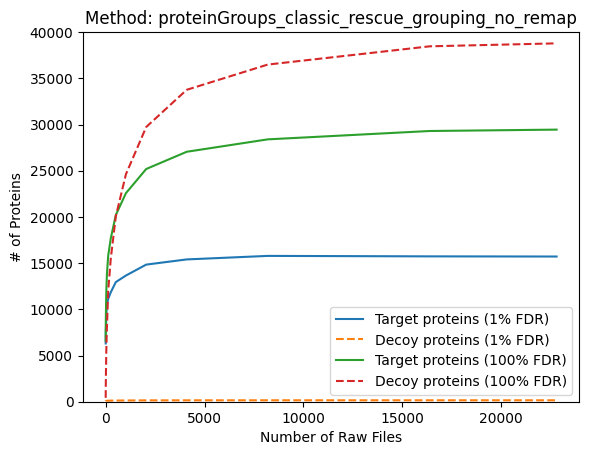

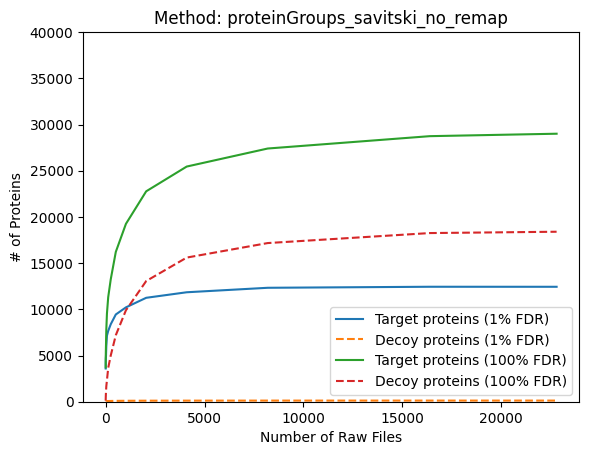

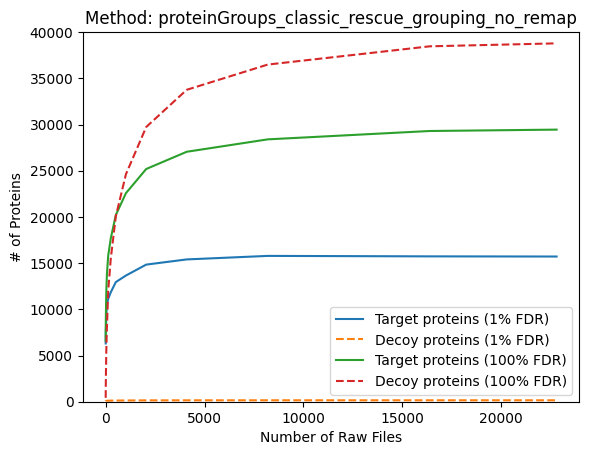

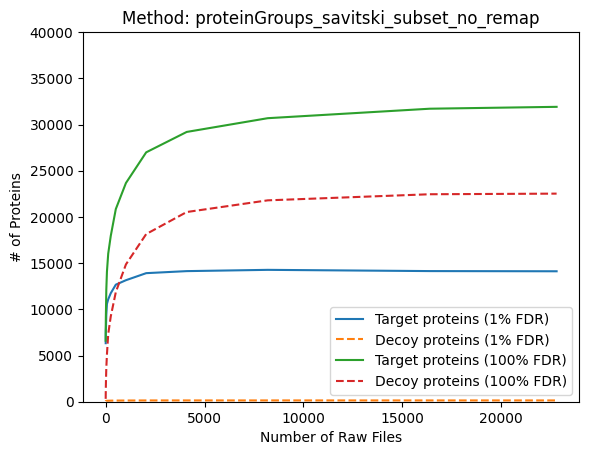

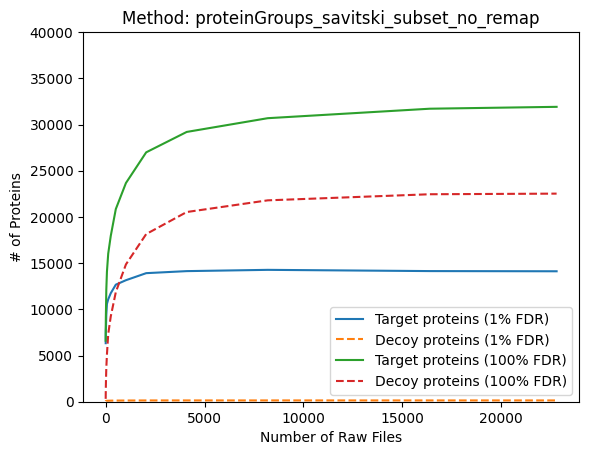

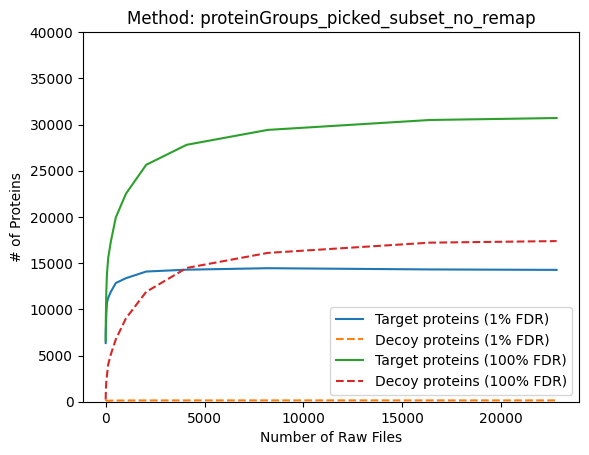

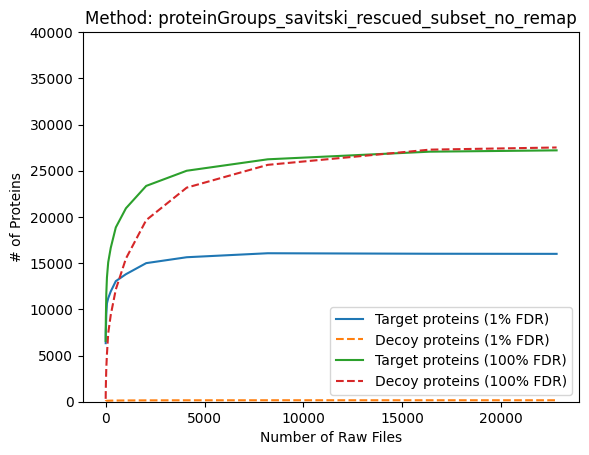

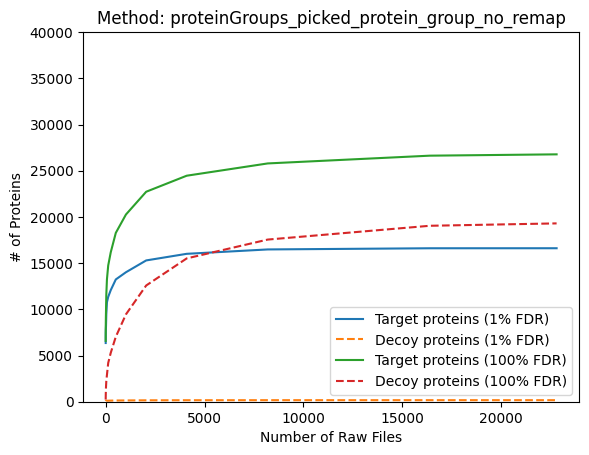

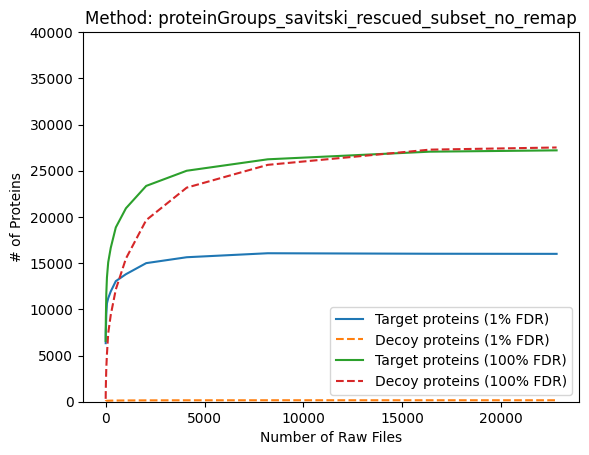

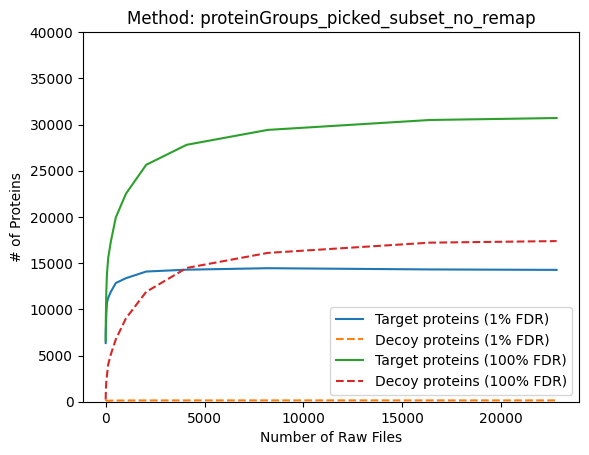

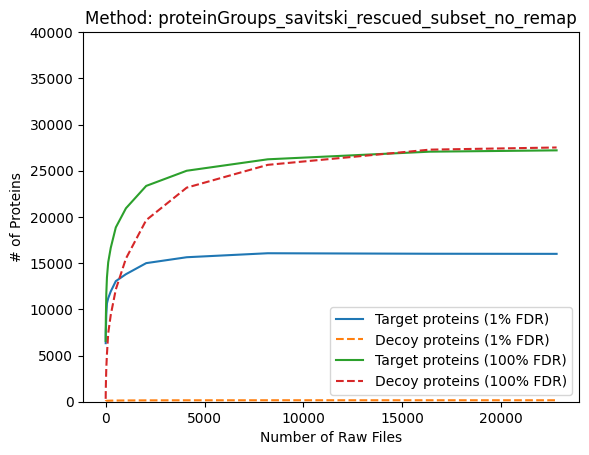

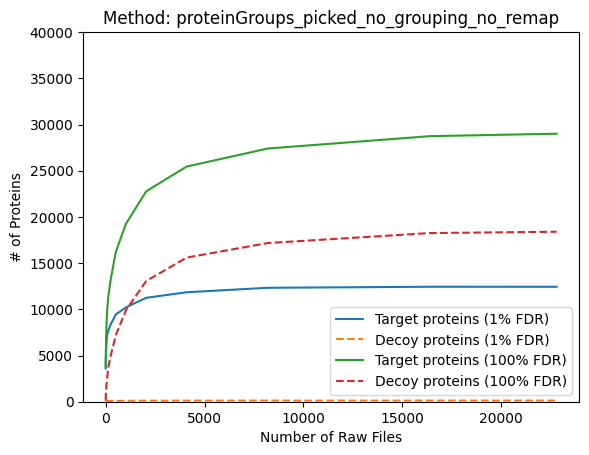

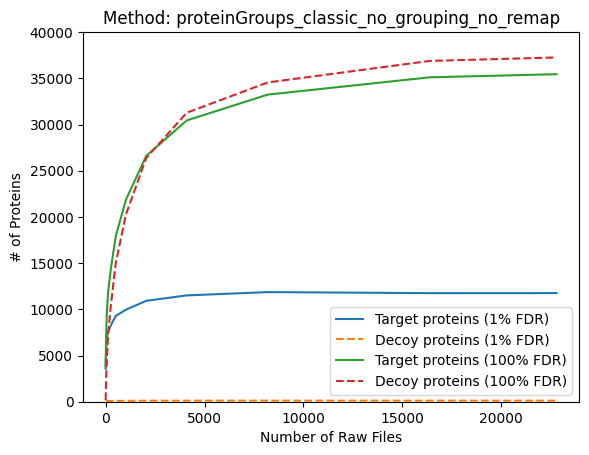

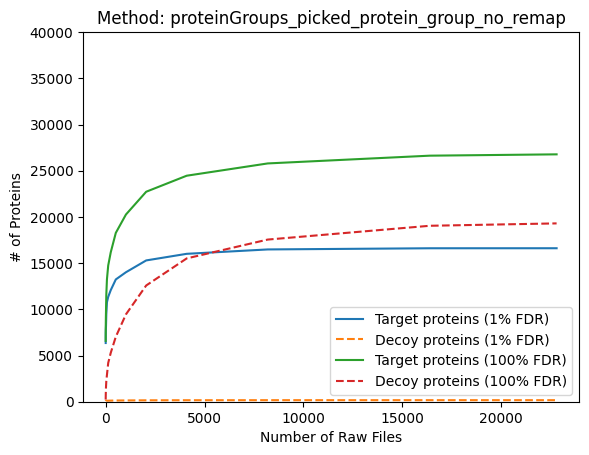

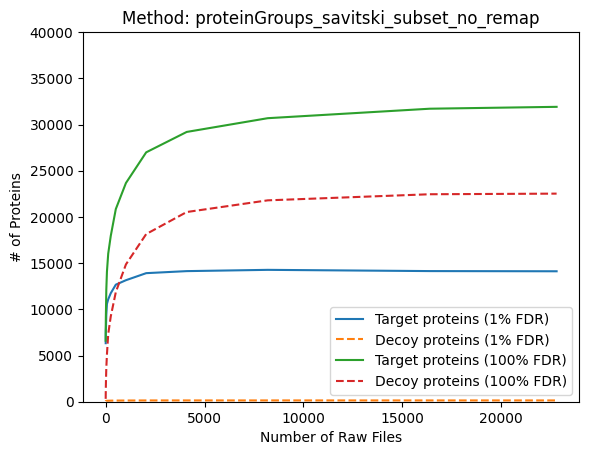

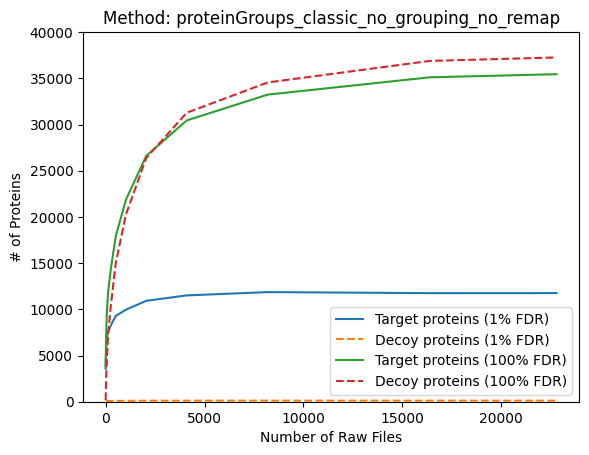

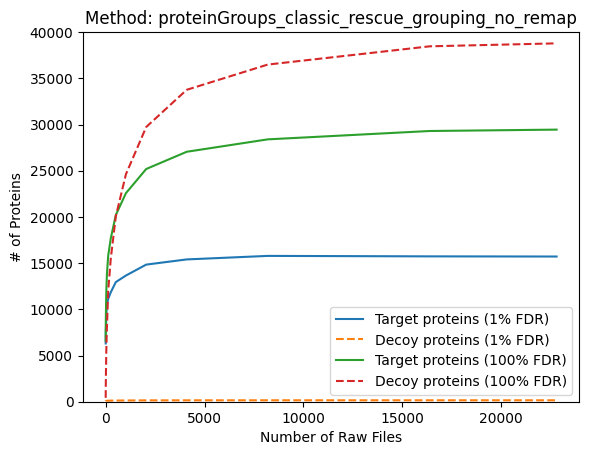

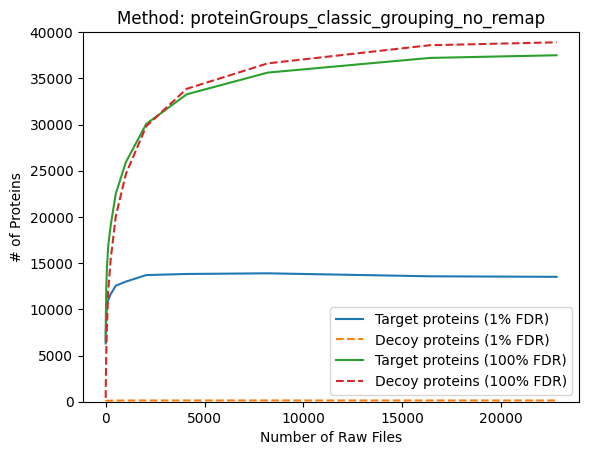

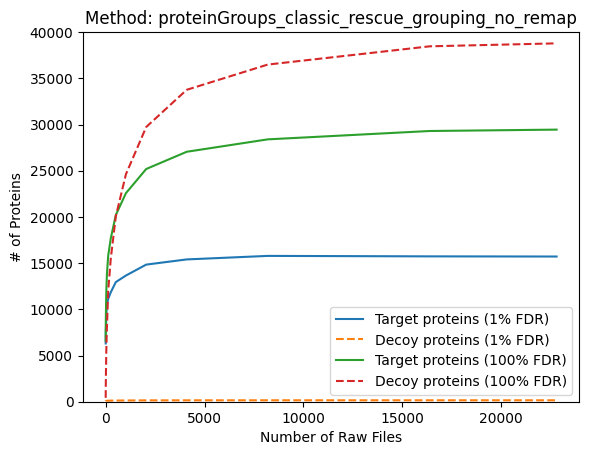

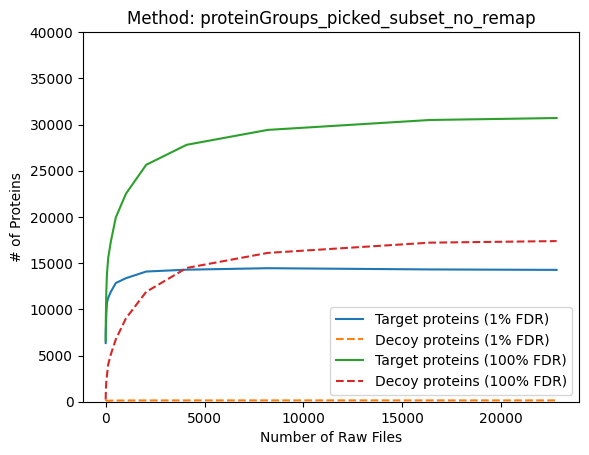

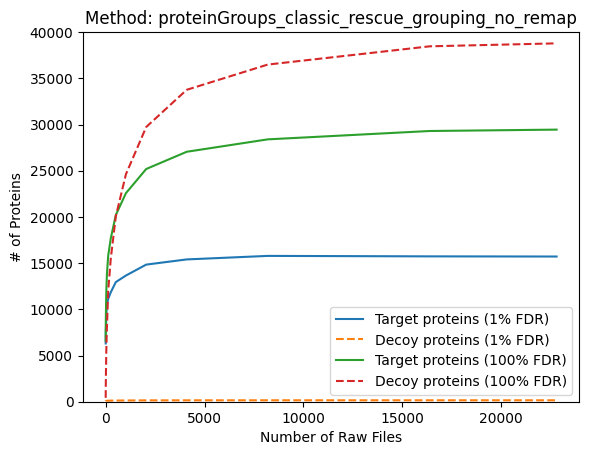

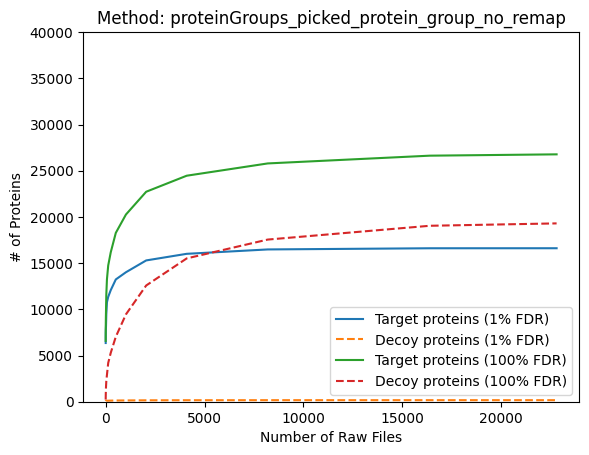

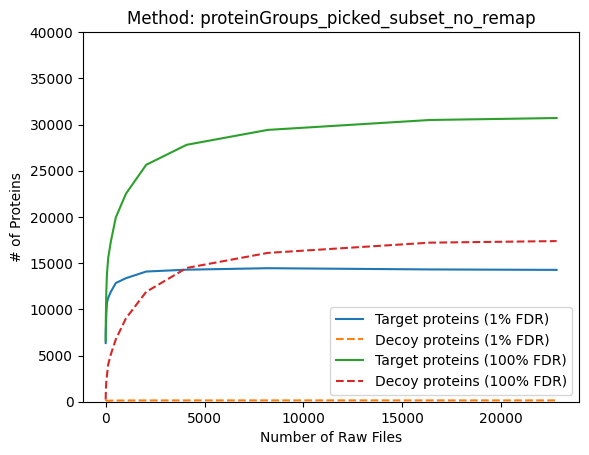

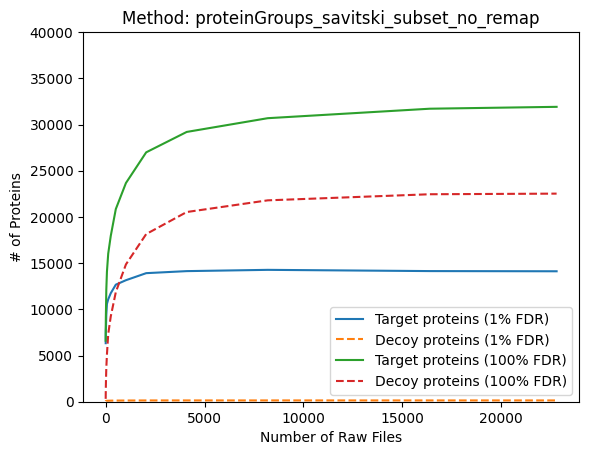

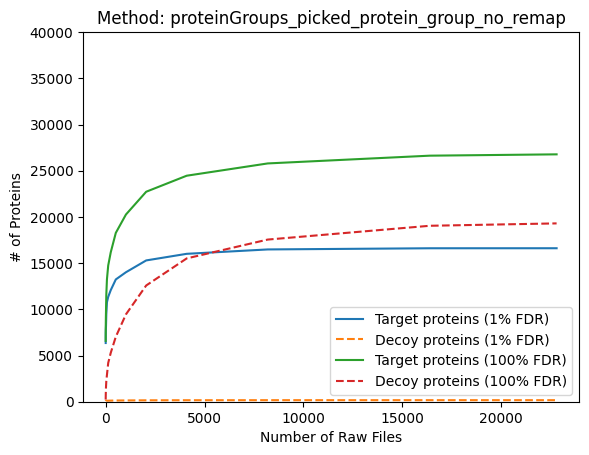

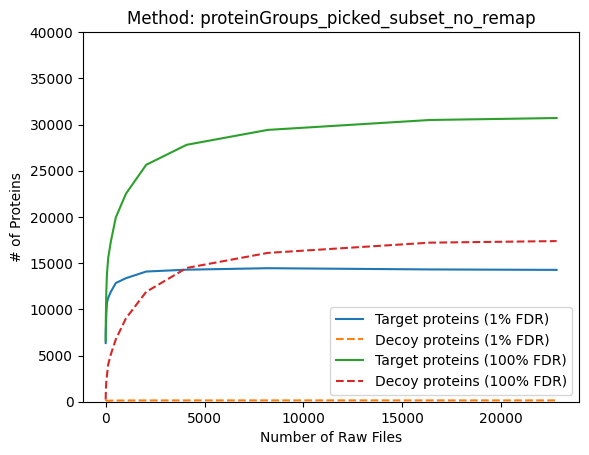

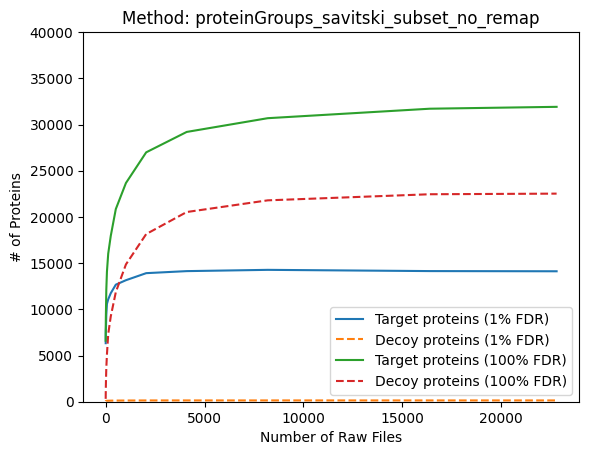

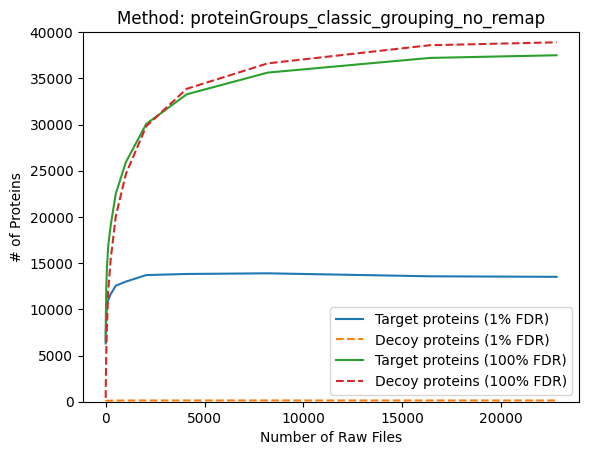

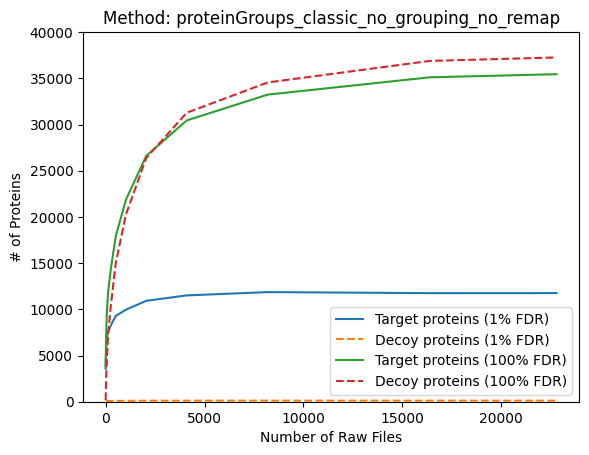

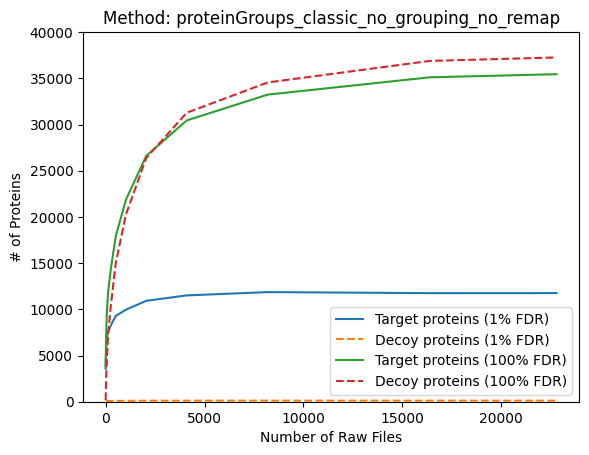

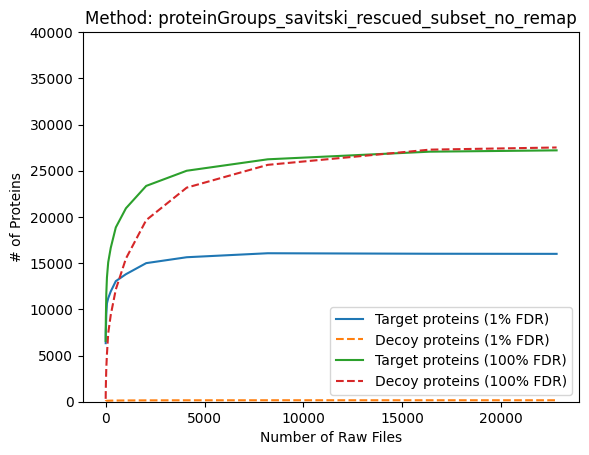

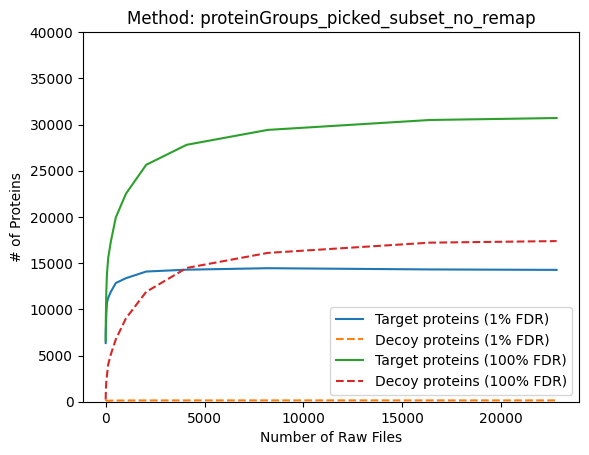

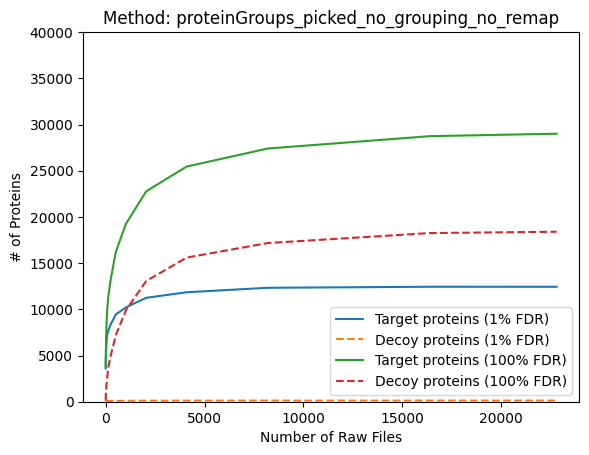

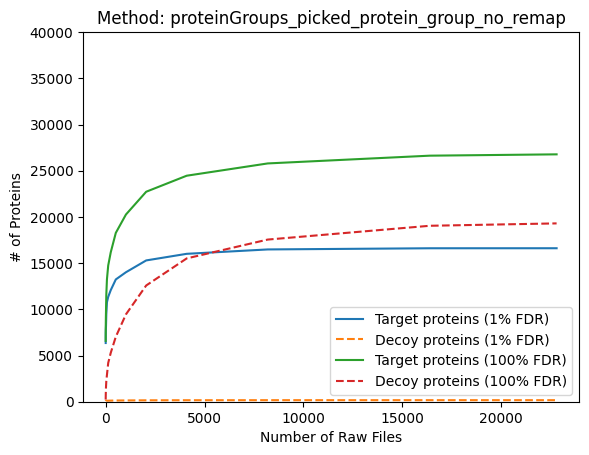

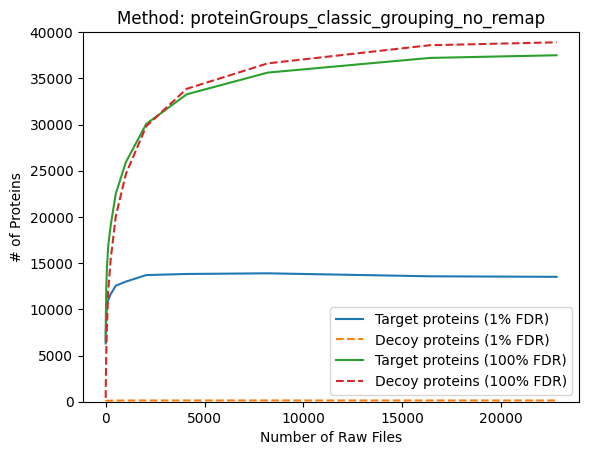

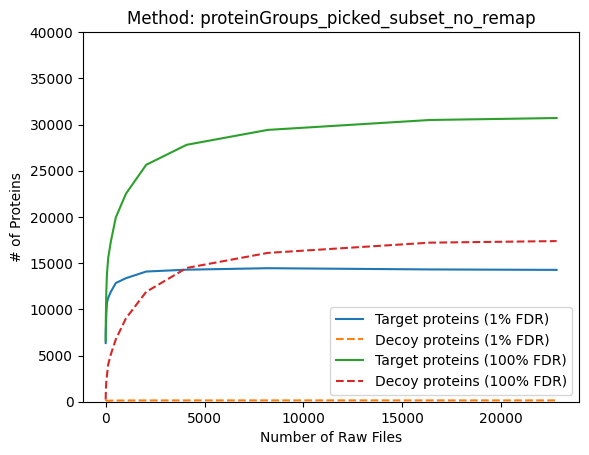

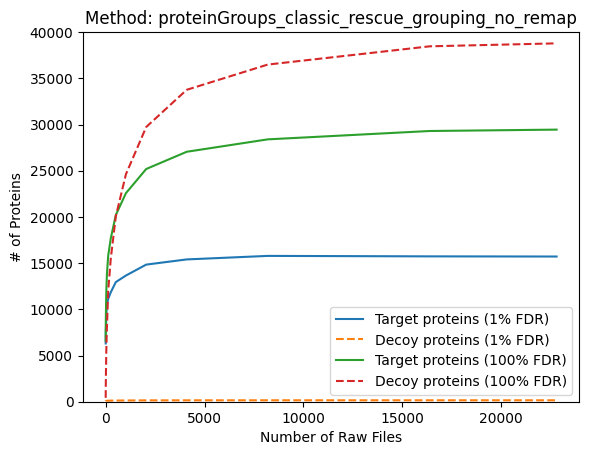

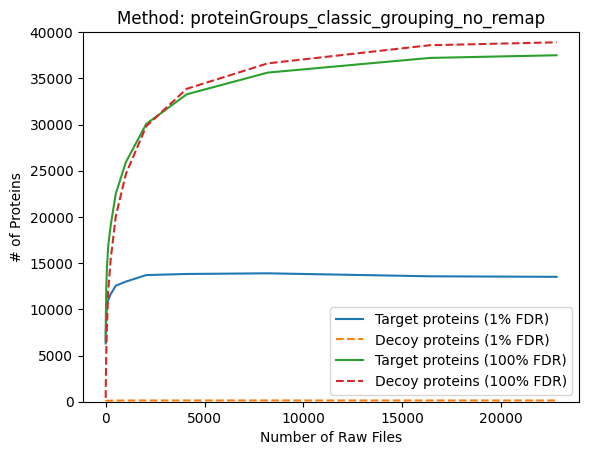

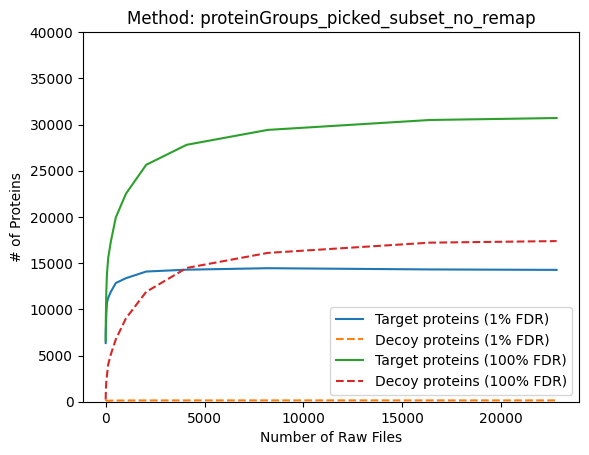

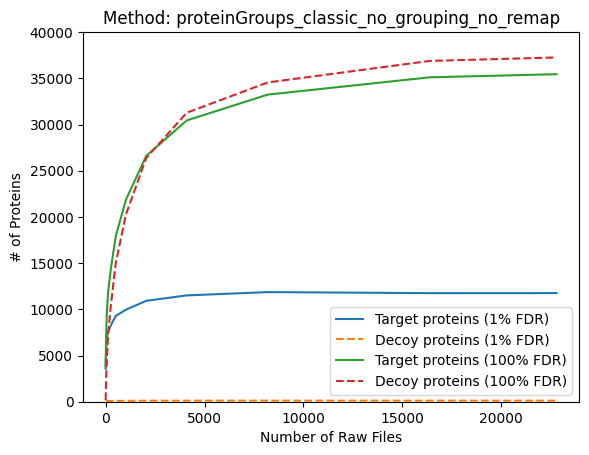

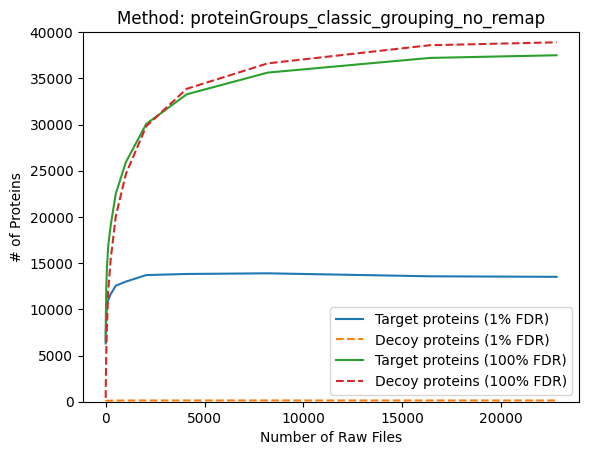

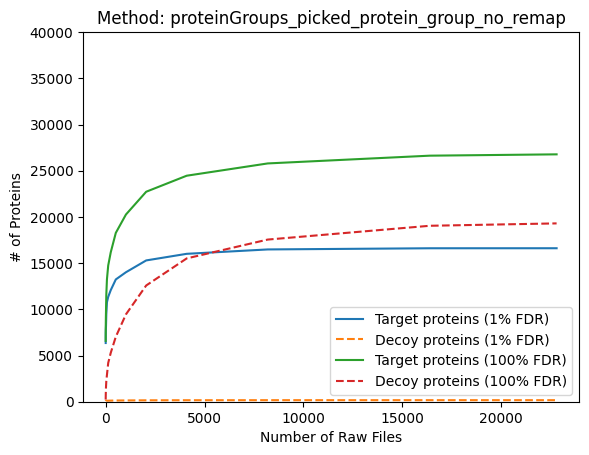

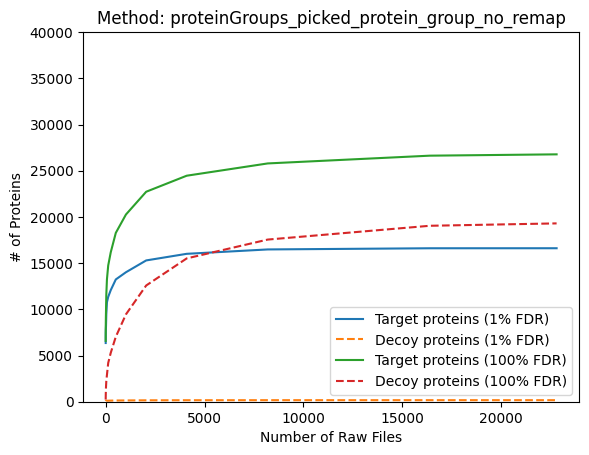

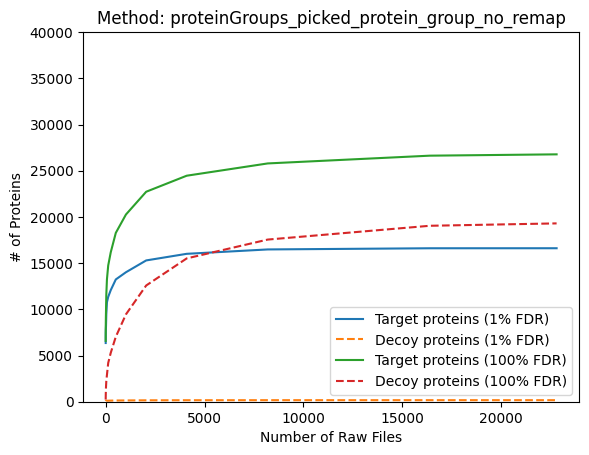

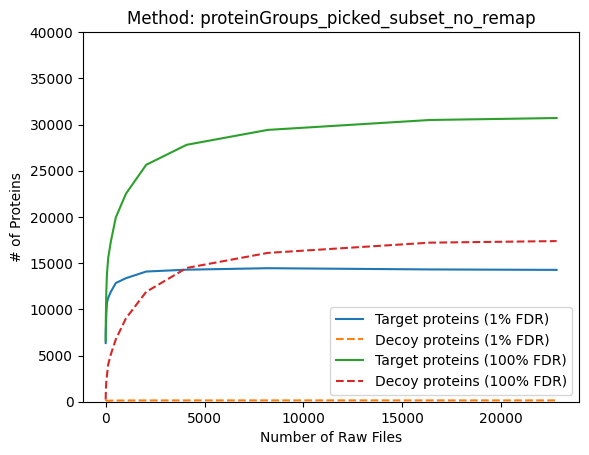

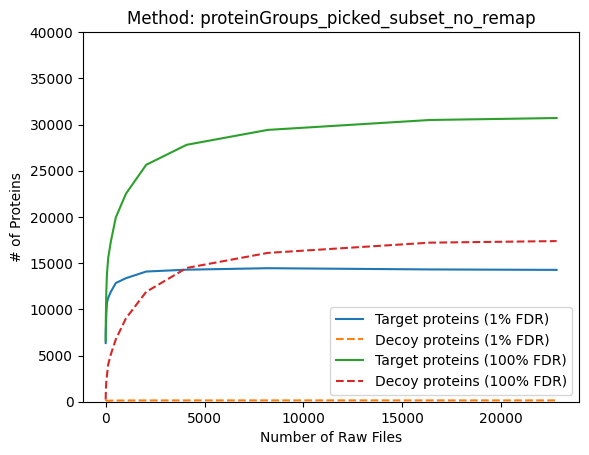

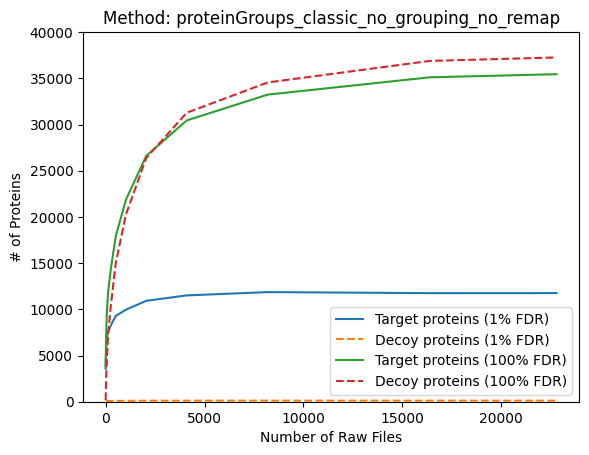

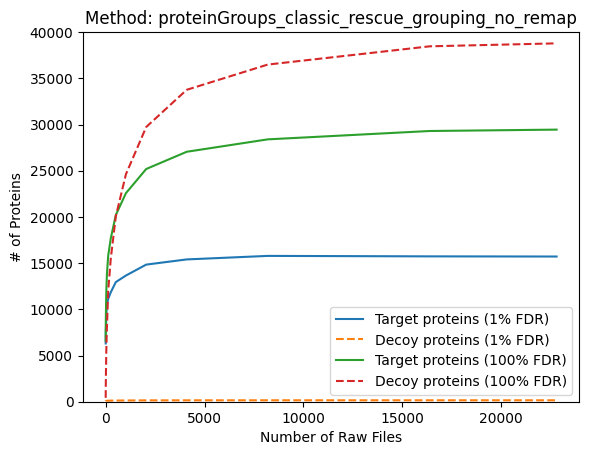

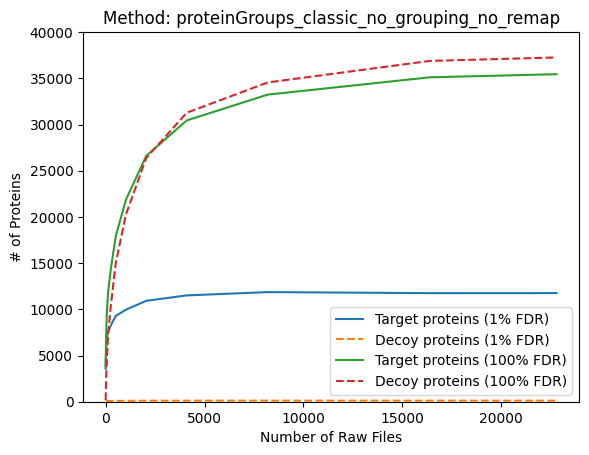

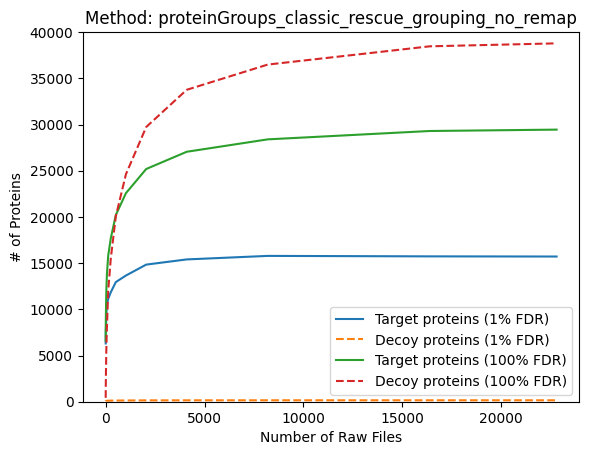

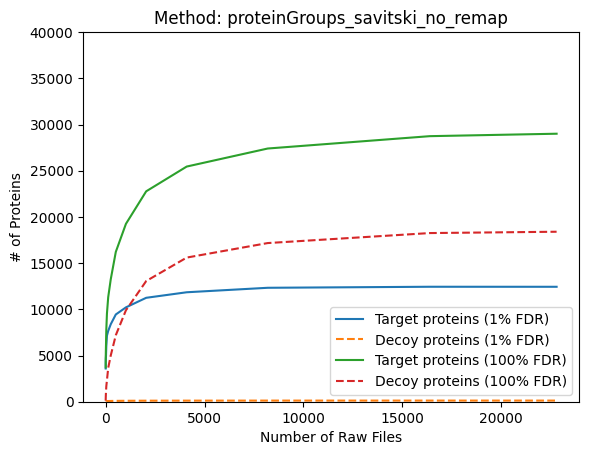

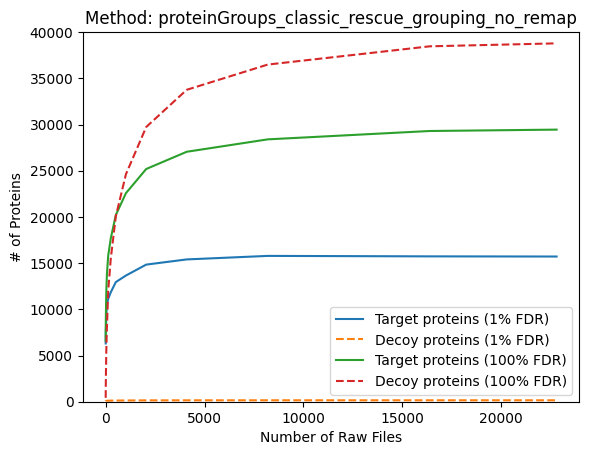

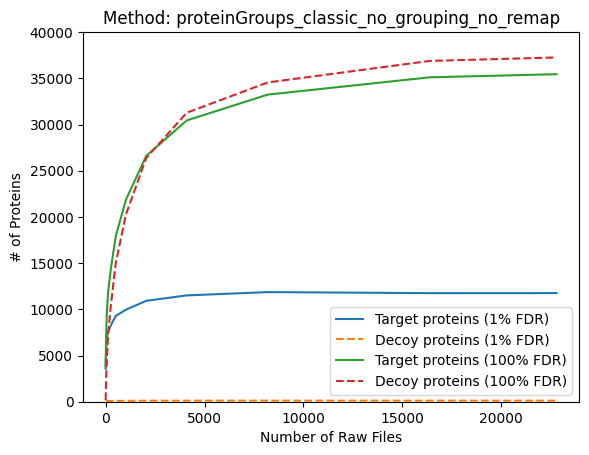

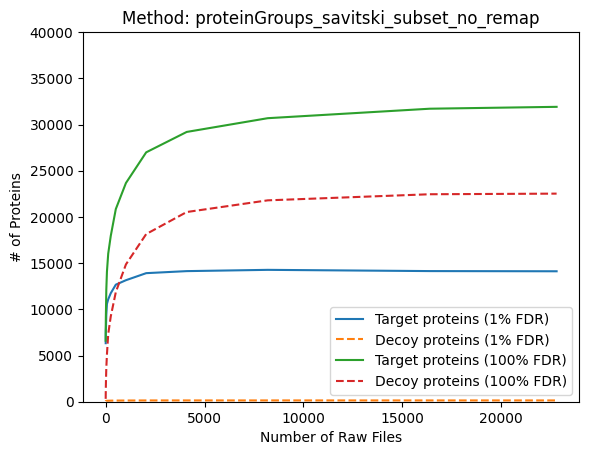

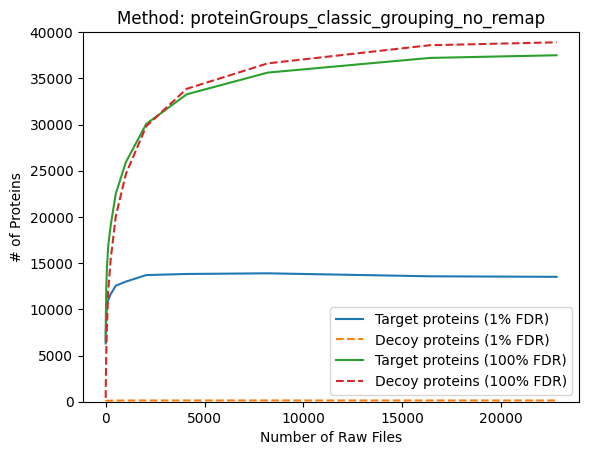

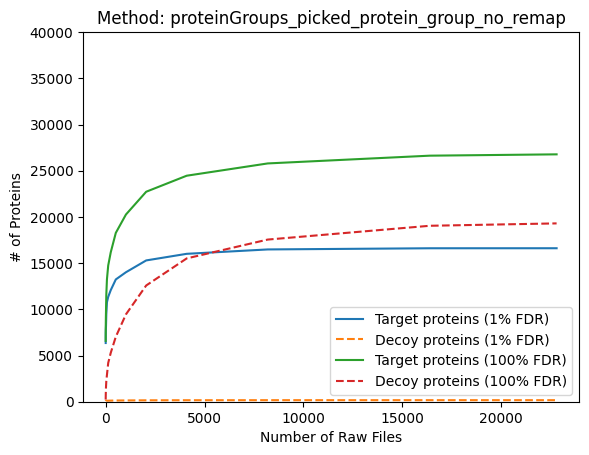

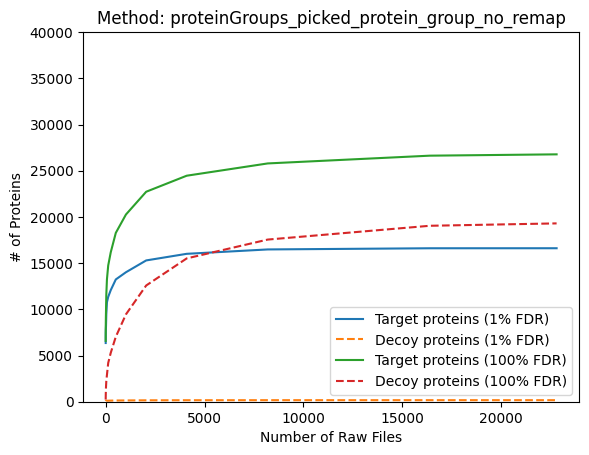

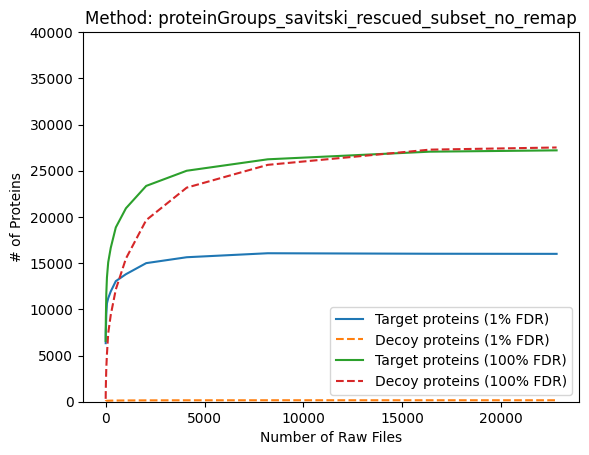

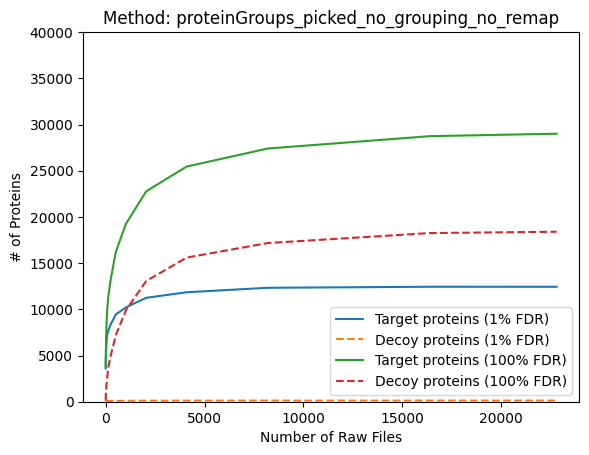

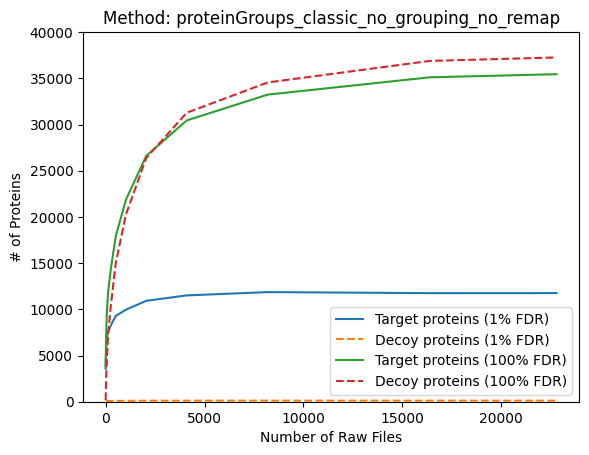

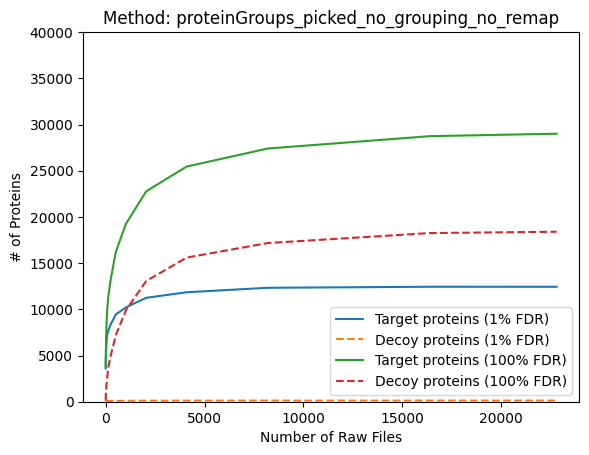

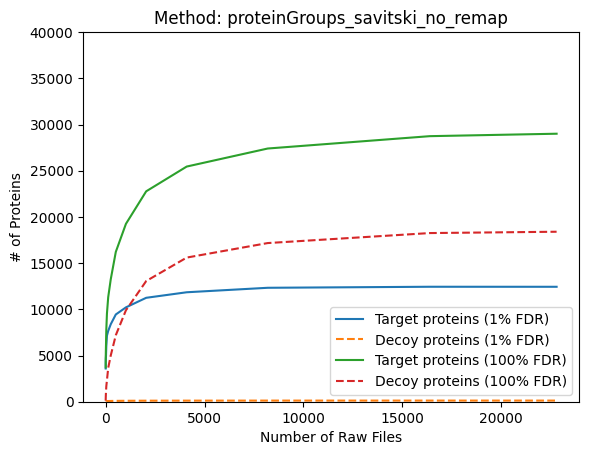

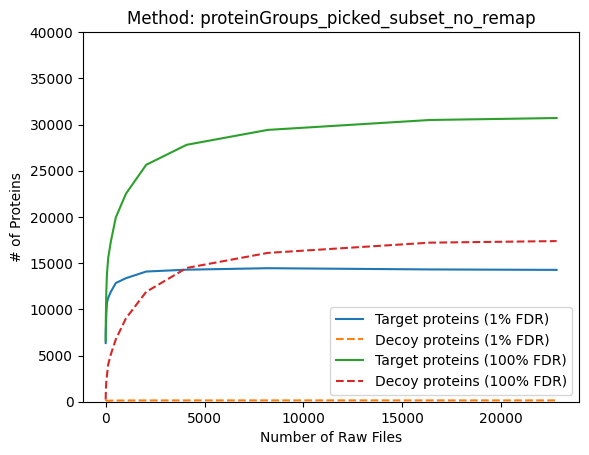

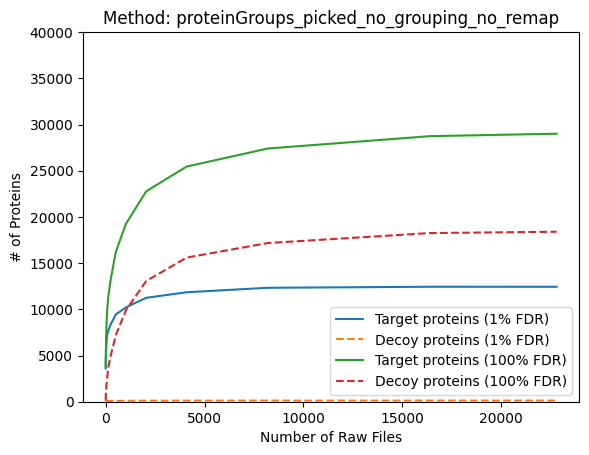

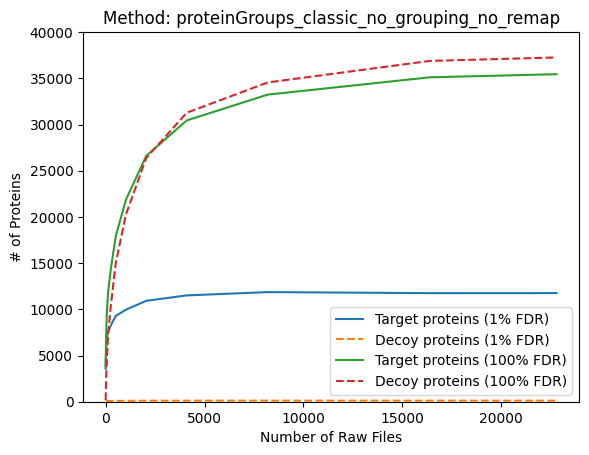

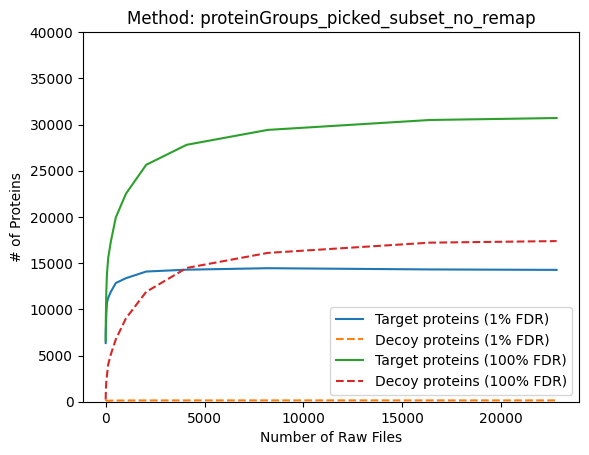

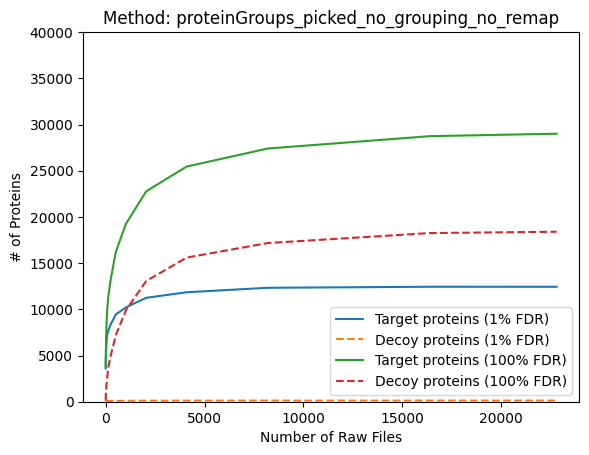

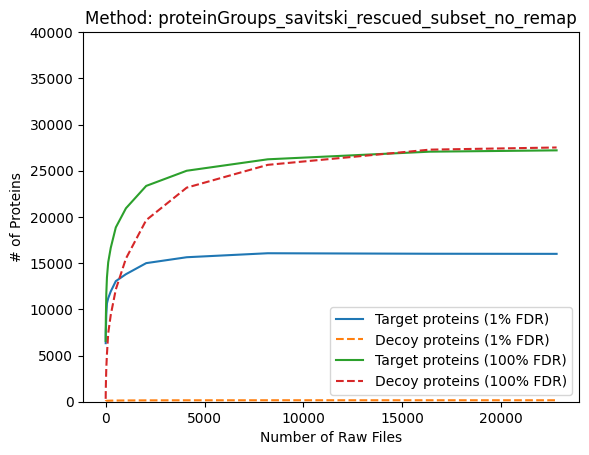

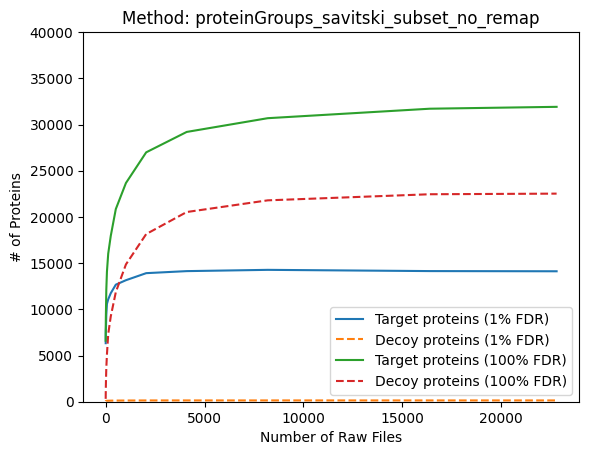

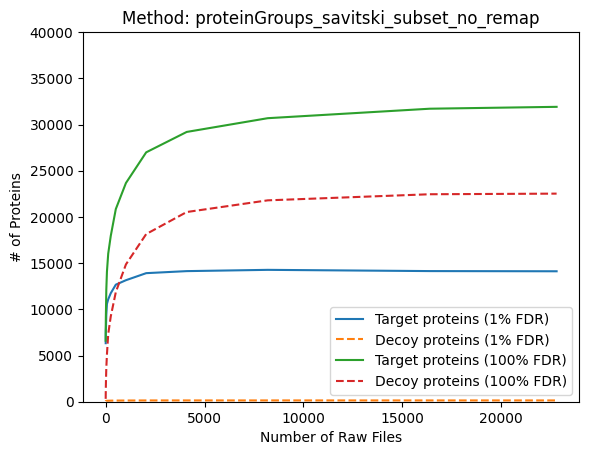

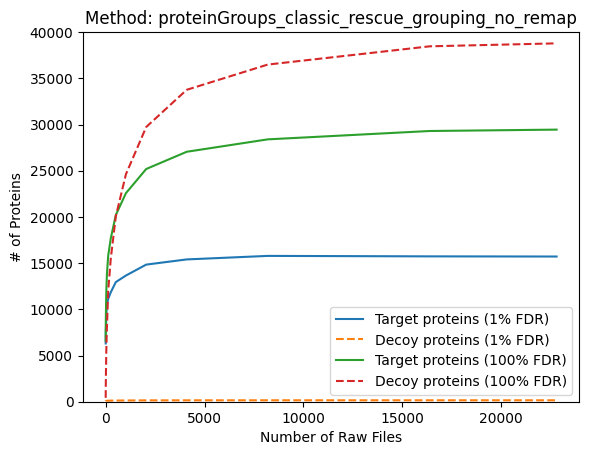

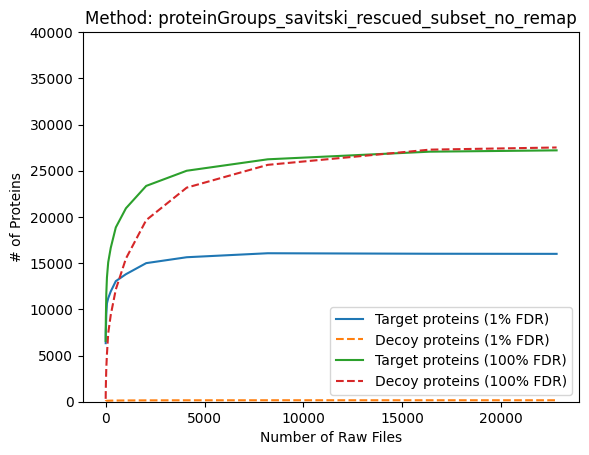

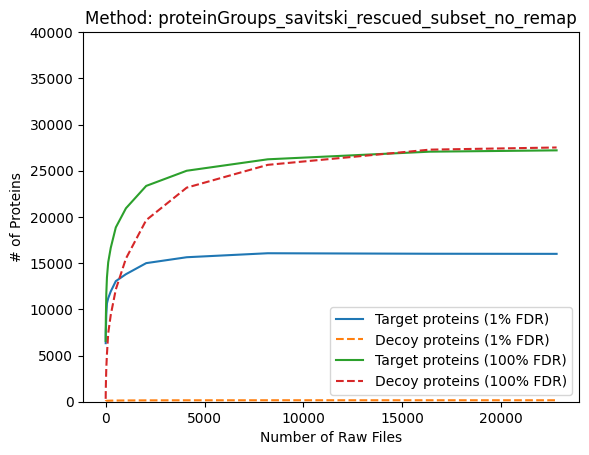

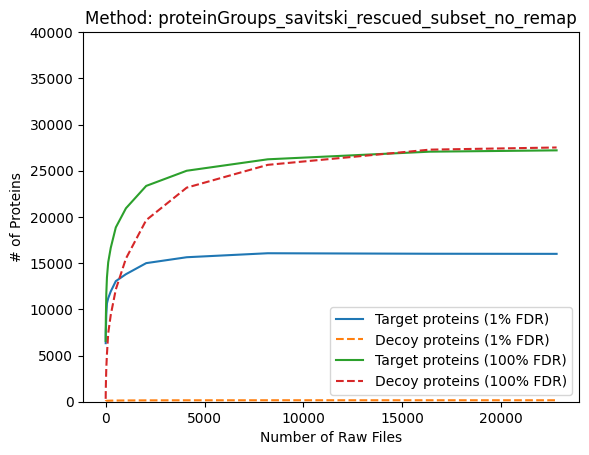

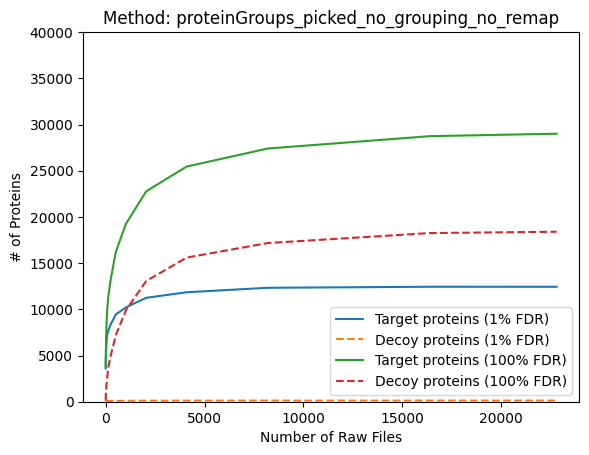

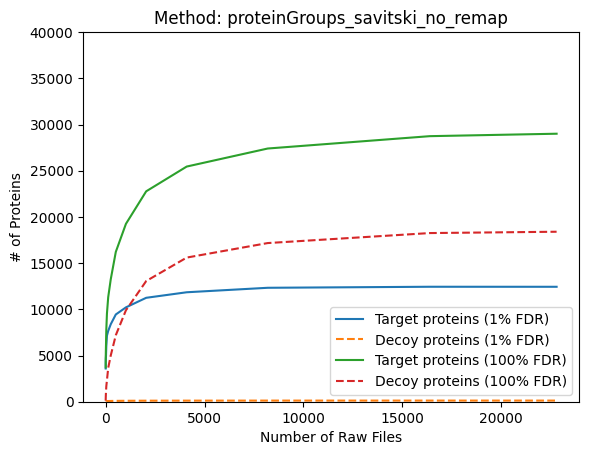

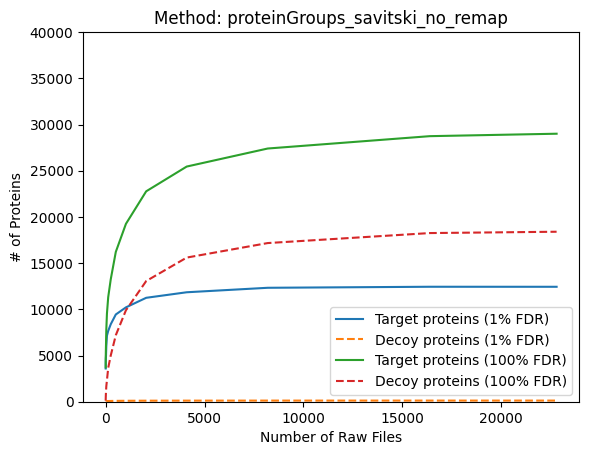

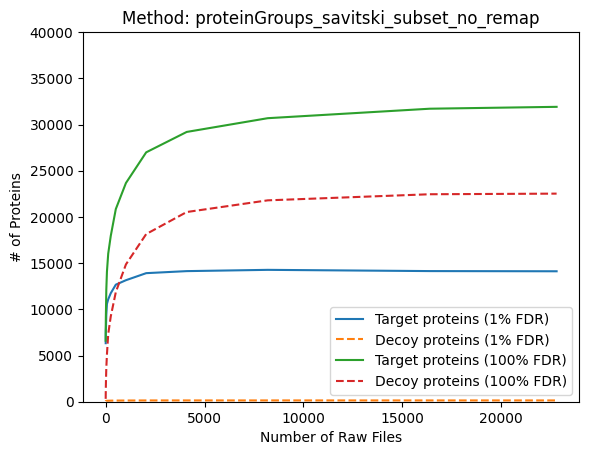

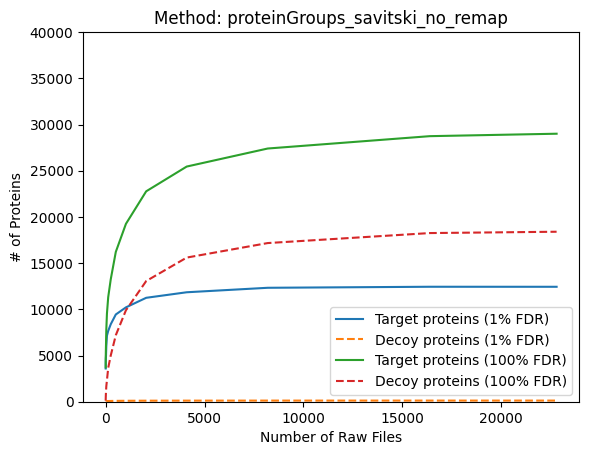

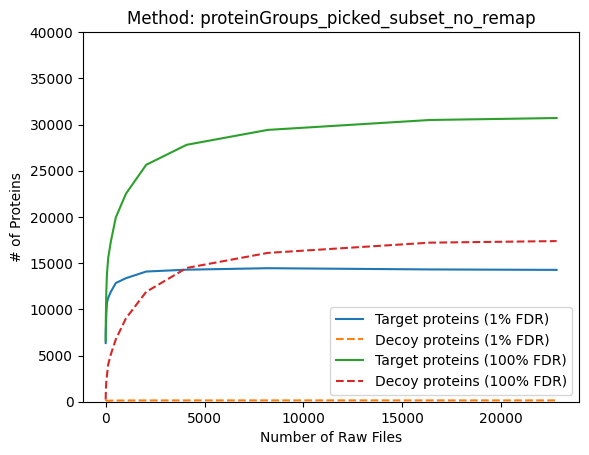

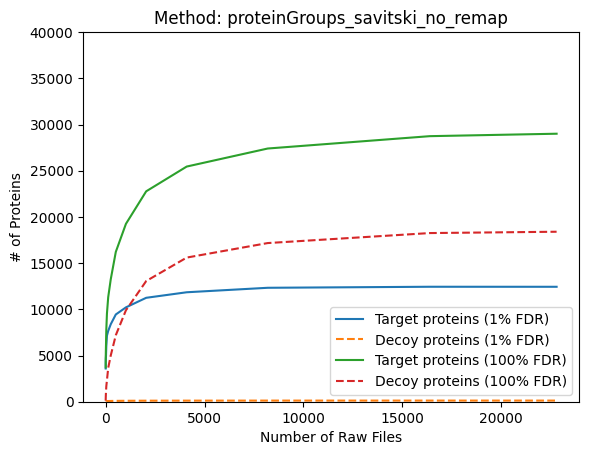

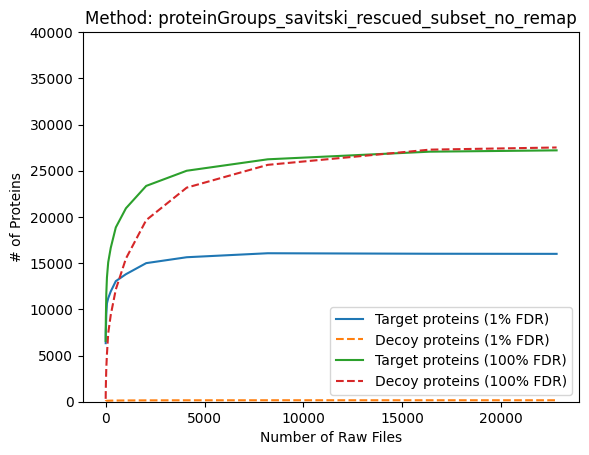

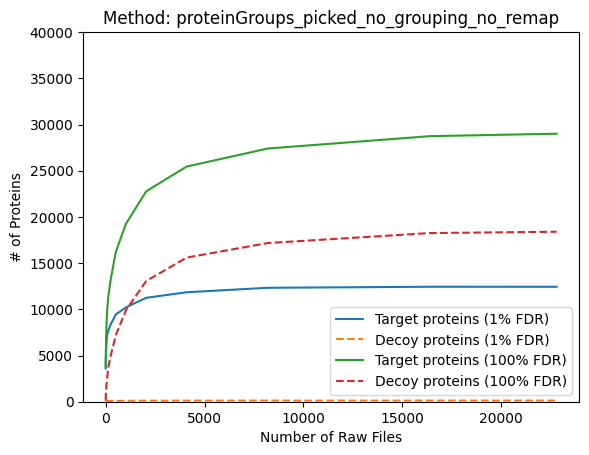

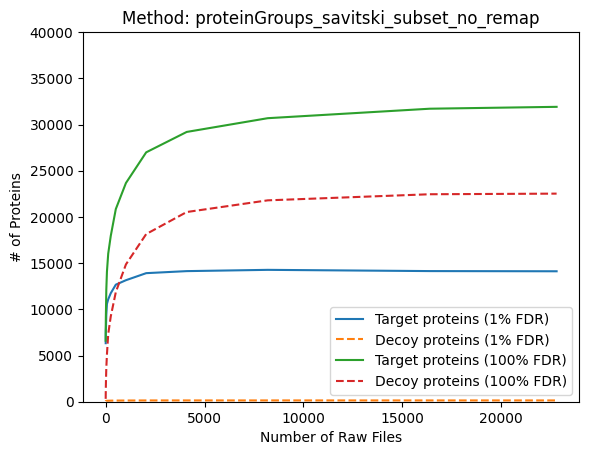

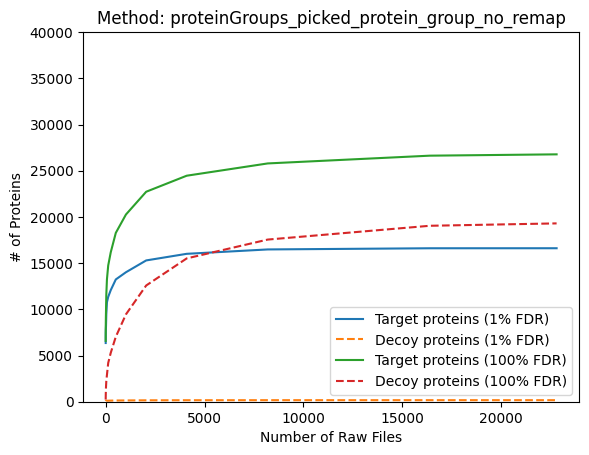

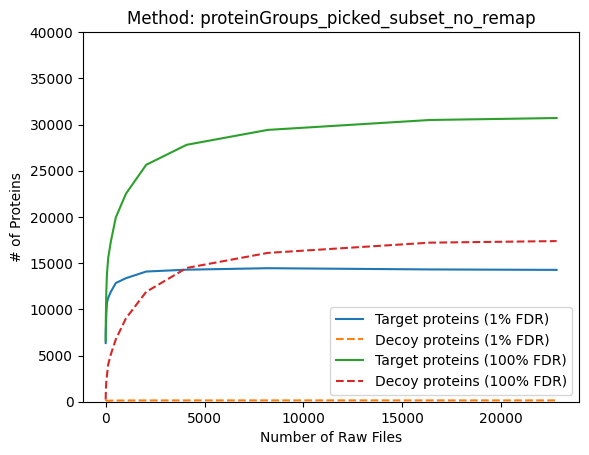

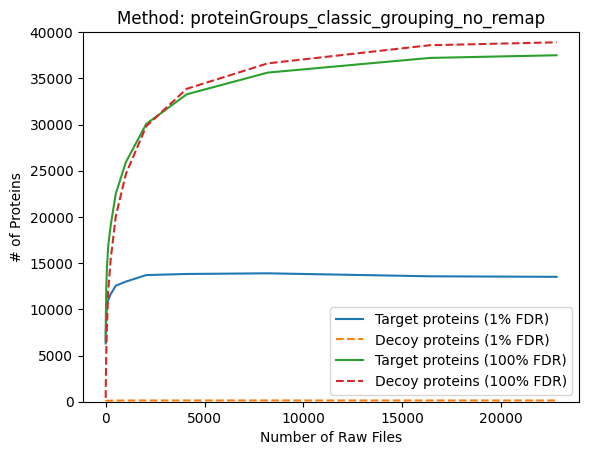

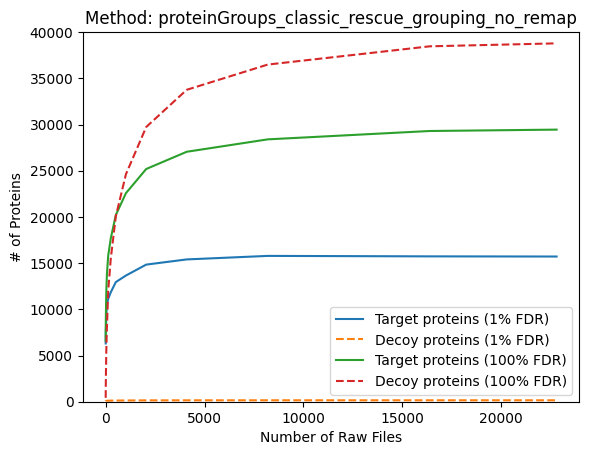

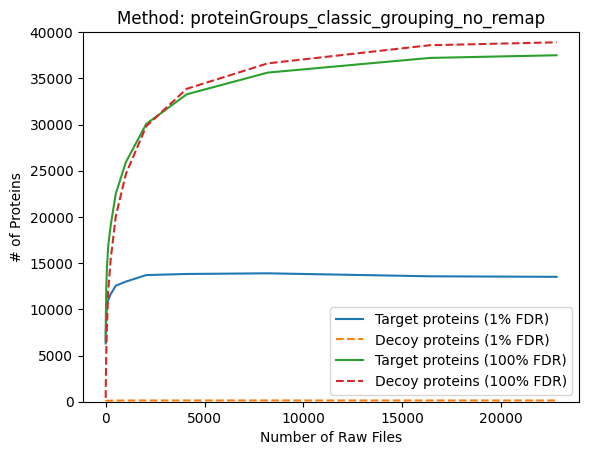

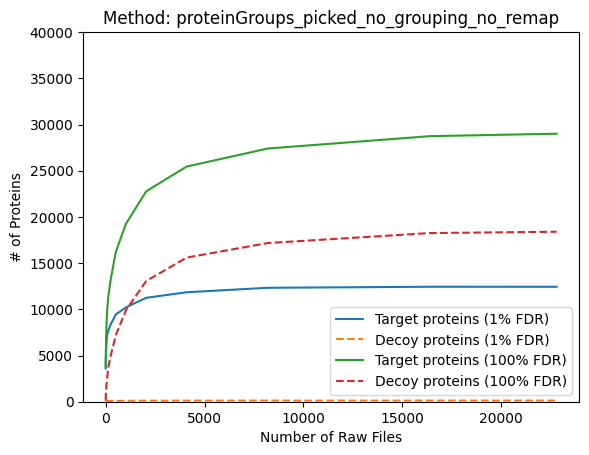

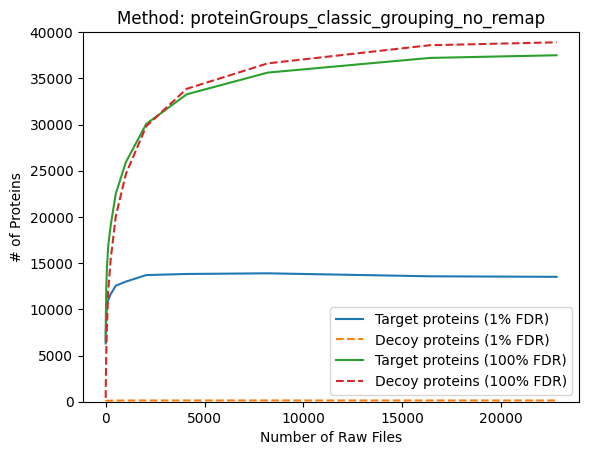

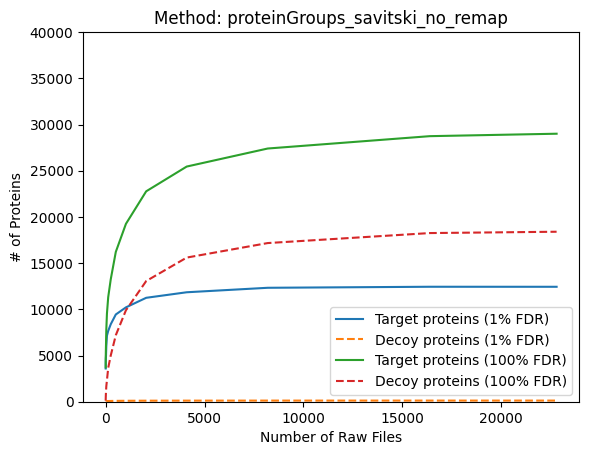

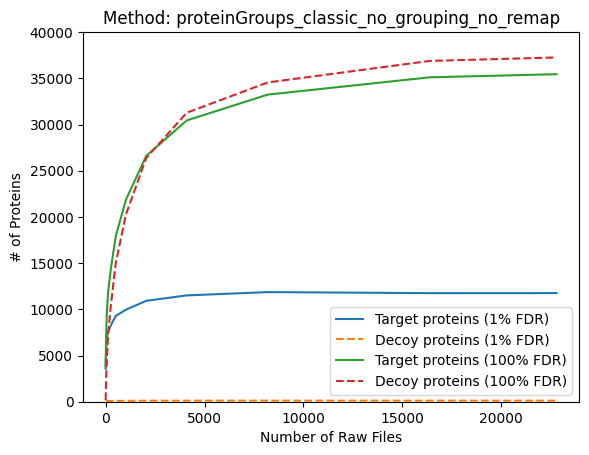

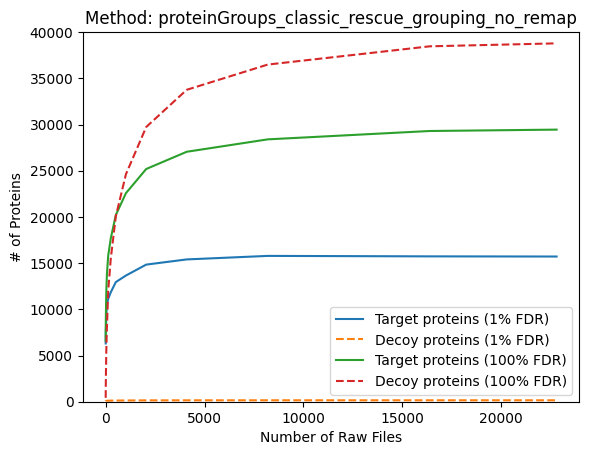

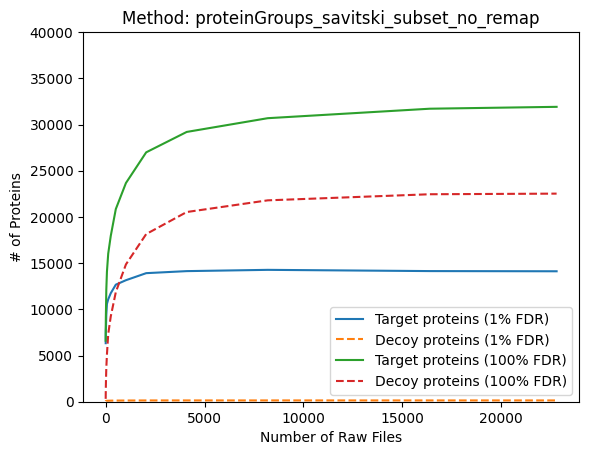

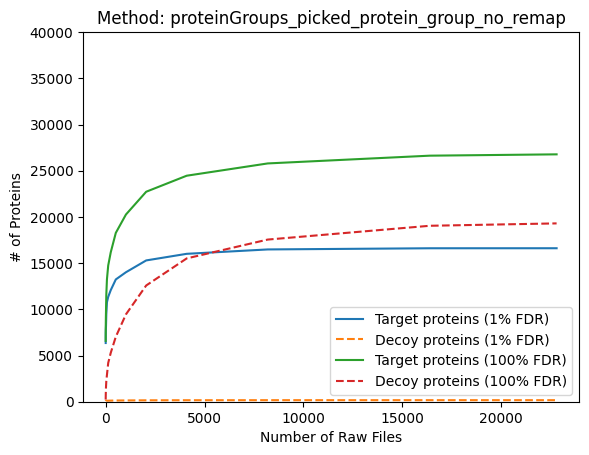

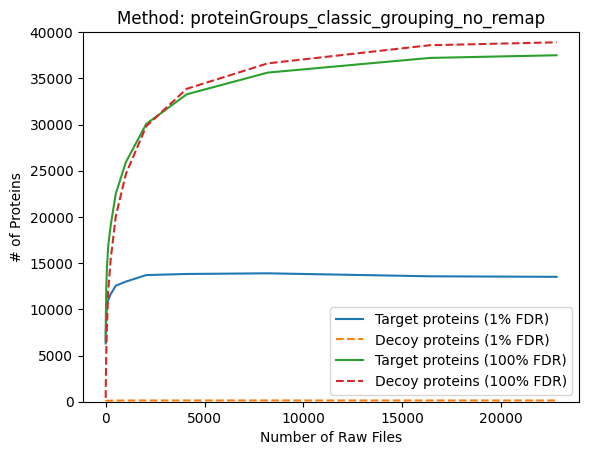

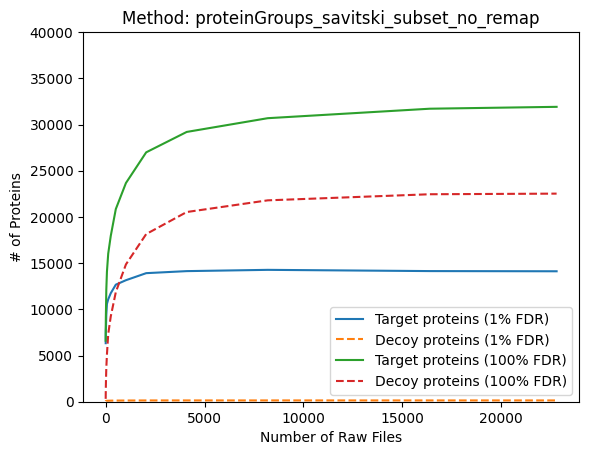

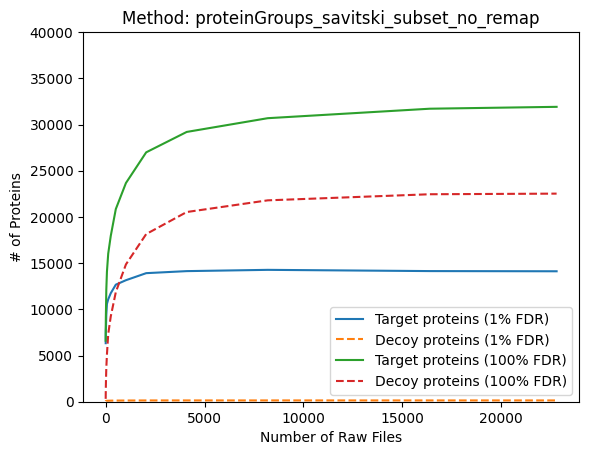

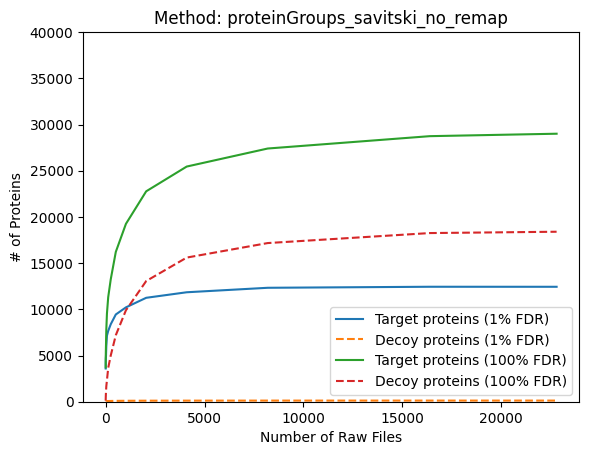

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV files into DataFrames
df_q001 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/individual_plots.csv')

df_fdr100 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/individual_plots_100_FDR.csv')


# group the DataFrames by method
grouped_q001 = df_q001.groupby("method")
grouped_fdr100 = df_fdr100.groupby("method")

# specify the method(s) you want to plot
methods_to_plot = df_fdr100['method']

# plot the data for the specified method(s)
for method in methods_to_plot:
    # get the groups for the specified method from each DataFrame
    group_q001 = grouped_q001.get_group(method)
    group_fdr100 = grouped_fdr100.get_group(method)
    
    # sort the groups by number of raw files
    group_q001 = group_q001.sort_values(by="num raw files")
    group_fdr100 = group_fdr100.sort_values(by="num raw files")
    
    # plot the data for target and decoy proteins at 1% FDR
    plt.plot(group_q001["num raw files"], group_q001["target proteins"], label="Target proteins (1% FDR)")
    plt.plot(group_q001["num raw files"], group_q001["decoy proteins"], label="Decoy proteins (1% FDR)", linestyle='--')
    
    # plot the data for target and decoy proteins at 100% FDR
    plt.plot(group_fdr100["num raw files"], group_fdr100["target proteins"], label="Target proteins (100% FDR)")
    plt.plot(group_fdr100["num raw files"], group_fdr100["decoy proteins"], label="Decoy proteins (100% FDR)", linestyle='--')
    
    # set the plot labels and title
    plt.xlabel("Number of Raw Files")
    plt.ylabel("# of Proteins")
    plt.title(f"Method: {method}")
    plt.ylim(0, 40000)
    
    # show the legend and plot
    plt.legend(loc="lower right")
    plt.savefig(f'/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/{method}.png', dpi=300)
    plt.show()


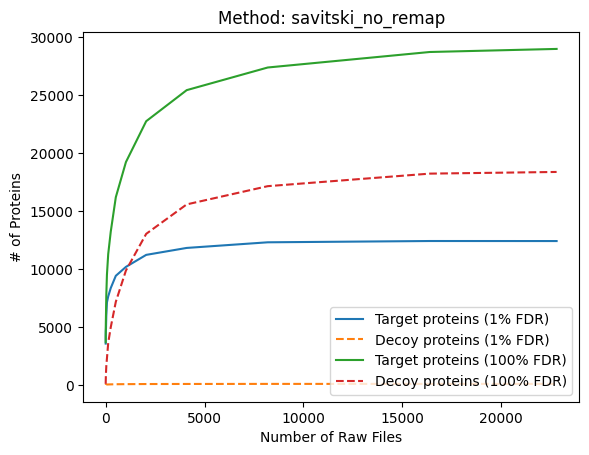

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV files into DataFrames
df_q001 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/0.01_Filter/individual_plots.csv')

df_fdr100 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/0.01_Filter/individual_plots_100_FDR.csv')


# group the DataFrames by method
grouped_q001 = df_q001.groupby("method")
grouped_fdr100 = df_fdr100.groupby("method")

# specify the method(s) you want to plot
methods_to_plot = ["proteinGroups_savitski_no_remap"]

# plot the data for the specified method(s)
for method in methods_to_plot:
    # get the groups for the specified method from each DataFrame
    group_q001 = grouped_q001.get_group(method)
    group_fdr100 = grouped_fdr100.get_group(method)
    
    # sort the groups by number of raw files
    group_q001 = group_q001.sort_values(by="num raw files")
    group_fdr100 = group_fdr100.sort_values(by="num raw files")
    
    # plot the data for target and decoy proteins at 1% FDR
    plt.plot(group_q001["num raw files"], group_q001["target proteins"], label="Target proteins (1% FDR)")
    plt.plot(group_q001["num raw files"], group_q001["decoy proteins"], label="Decoy proteins (1% FDR)", linestyle='--')
    
    # plot the data for target and decoy proteins at 100% FDR
    plt.plot(group_fdr100["num raw files"], group_fdr100["target proteins"], label="Target proteins (100% FDR)")
    plt.plot(group_fdr100["num raw files"], group_fdr100["decoy proteins"], label="Decoy proteins (100% FDR)", linestyle='--')
    
    # set the plot labels and title
    plt.xlabel("Number of Raw Files")
    plt.ylabel("# of Proteins")
    plt.title(f"Method: savitski_no_remap")
    
    # show the legend and plot
    plt.legend(loc="lower right")
    plt.show()


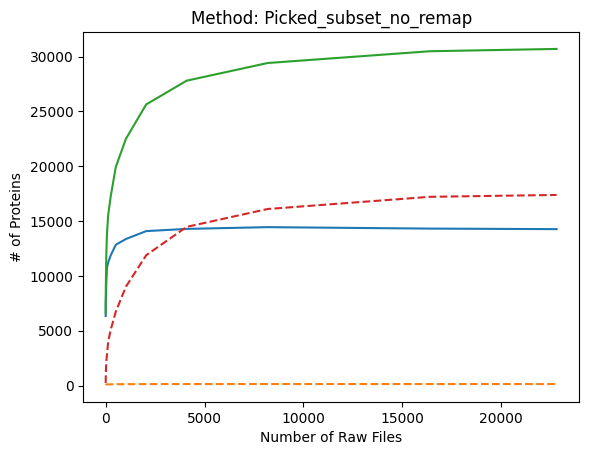

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV files into DataFrames
df_q001 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/0.01_Filter/individual_plots.csv')

df_fdr100 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Conversion_Delete/0.01_Filter/individual_plots_100_FDR.csv')


# group the DataFrames by method
grouped_q001 = df_q001.groupby("method")
grouped_fdr100 = df_fdr100.groupby("method")

# specify the method(s) you want to plot
methods_to_plot = ["proteinGroups_picked_subset_no_remap"]

# plot the data for the specified method(s)
for method in methods_to_plot:
    # get the groups for the specified method from each DataFrame
    group_q001 = grouped_q001.get_group(method)
    group_fdr100 = grouped_fdr100.get_group(method)
    
    # sort the groups by number of raw files
    group_q001 = group_q001.sort_values(by="num raw files")
    group_fdr100 = group_fdr100.sort_values(by="num raw files")
    
    # plot the data for target and decoy proteins at 1% FDR
    plt.plot(group_q001["num raw files"], group_q001["target proteins"], label="Target proteins (1% FDR)")
    plt.plot(group_q001["num raw files"], group_q001["decoy proteins"], label="Decoy proteins (1% FDR)", linestyle='--')
    
    # plot the data for target and decoy proteins at 100% FDR
    plt.plot(group_fdr100["num raw files"], group_fdr100["target proteins"], label="Target proteins (100% FDR)")
    plt.plot(group_fdr100["num raw files"], group_fdr100["decoy proteins"], label="Decoy proteins (100% FDR)", linestyle='--')
    
    # set the plot labels and title
    plt.xlabel("Number of Raw Files")
    plt.ylabel("# of Proteins")
    plt.title(f"Method: Picked_subset_no_remap")
    plt.savefig("Picked_subset_no_remap.png")
    
    # show the legend and plot
    #plt.legend(loc="lower right", fontsize=12)
    plt.show()

    